#**Task**

Alta Bicycle Share, the company that owns and operates the Citi Bike program, is facing some unexpected financial difficulties as a result of dropping sponsorship revenue for the bike share program. Faced with a revenue shortfall, Alta would like you to mine the Citi Bike stations and trips data to come up with solutions and projected revenue impact. Alternatively, you could investigate ways to reduce expenses without impacting ride volume too negatively.



##**1. Data**
For this project, I will be using "NYC Citi Bike Trips and Stations" public data set which can be found on Google BigQuery [here]('https://console.cloud.google.com/bigquery?project=bigquery-public-data&page=table&t=citibike_stations&d=new_york&p=bigquery-public-data&redirect_from_classic=true') or at Citi Bike's website [here]('https://www.citibikenyc.com/system-data'). But, I used Citi Bike trips data for 2016 and 2017; the stations data for 2021.

First, I will import the libraries to use in this project. Then, read the 2012 and 2017 Citi Bike's trip csv files to pandas



In [ ]:
#import the libraries

import os
import glob
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

##**A. Trips Data**

Here, I connected this notebook to my drive and imported the data.

In [ ]:
from google.colab import drive        #connected my google drive to this notebook
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/My Drive/CitiBike")


extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]


#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])

#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

##**2. Data Exploration**

I will check for the missing values and datatypes of columns

In [ ]:
#renaming the dataframe
df_trip = combined_csv


#check for missing values
#check the shape of the dataframe

print(df_trip.shape)
print('------------------------------------------\n')
df_trip.info()

(542512, 30)
------------------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542512 entries, 0 to 15897
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Trip Duration            286737 non-null  float64
 1   Start Time               286737 non-null  object 
 2   Stop Time                286737 non-null  object 
 3   Start Station ID         286737 non-null  float64
 4   Start Station Name       286737 non-null  object 
 5   Start Station Latitude   286737 non-null  float64
 6   Start Station Longitude  286737 non-null  float64
 7   End Station ID           286737 non-null  float64
 8   End Station Name         286737 non-null  object 
 9   End Station Latitude     286737 non-null  float64
 10  End Station Longitude    286737 non-null  float64
 11  Bike ID                  286737 non-null  float64
 12  User Type                286240 non-null  object 
 13  Bir

As seen from the above results, the column names are not uniform i.e.different name formatting. I will assign the names to be the same. There are lots of missing values, mismatched data types. So, next step is the data cleaning.


##**3. Data Preprocessing**
At this step, I will do the following:
* Normalize the column names
* Concatenate columns from index 15 with column index 0-14 rowwise
* Drop rows with missing values
* Separate the starttime and stoptime columns into date and time columns
* Add day of the week columns
* Add month  and year columns

In [ ]:
#column names
df_trip.columns



Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender', 'tripduration', 'starttime', 'stoptime',
       'start station id', 'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [ ]:
#normalize the column names
df_trip.rename(columns={'Trip Duration':'tripduration', 'Start Time':'starttime', 'Stop Time':'stoptime', 'Start Station ID':'start_station_id',
       'Start Station Name':'start_station_name', 'Start Station Latitude':'start_station_latitude',
       'Start Station Longitude':'start_station_longitude', 'End Station ID':'end_station_id', 'End Station Name':'end_station_name',
       'End Station Latitude':'end_station_latitude', 'End Station Longitude':'end_station_longitude', 'Bike ID':'bikeid', 'User Type':'usertype',
       'Birth Year':'birth_year', 'Gender':'gender', 'tripduration':'tripduration', 'starttime':'starttime', 'stoptime':'stoptime',
       'start station id':'start_station_id', 'start station name':'start_station_name', 'start station latitude':'start_station_latitude',
       'start station longitude':'start_station_longitude', 'end station id':'end_station_id', 'end station name':'end_station_name',
       'end station latitude':'end_station_latitude', 'end station longitude':'end_station_longitude', 'bikeid':'bikeid', 'usertype':'usertype',
       'birth year':'birth_year', 'gender':'gender'}, inplace=True)

In [ ]:
#Check the new column names

df_trip.columns

Index(['tripduration', 'starttime', 'stoptime', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender', 'tripduration', 'starttime', 'stoptime',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender'],
      dtype='object')

The column names are set. Next, transpose the columns from index 15 to rows. Then assign a new name to the dataframe

In [ ]:
trip = pd.concat([df_trip.iloc[:, :15], df_trip.iloc[:, 15:]])

In [ ]:
#Check out the new dataframe

trip.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,148.0,2017-01-01 00:21:32,2017-01-01 00:24:01,3276.0,Marin Light Rail,40.714584,-74.042817,3185.0,City Hall,40.717732,-74.043845,24575.0,Subscriber,1983.0,1.0
1,1283.0,2017-01-01 00:24:35,2017-01-01 00:45:58,3183.0,Exchange Place,40.716247,-74.033459,3198.0,Heights Elevator,40.748716,-74.040443,24723.0,Subscriber,1978.0,1.0
2,372.0,2017-01-01 00:38:19,2017-01-01 00:44:31,3183.0,Exchange Place,40.716247,-74.033459,3211.0,Newark Ave,40.721525,-74.046305,24620.0,Subscriber,1989.0,1.0
3,1513.0,2017-01-01 00:38:37,2017-01-01 01:03:50,3194.0,McGinley Square,40.725340,-74.067622,3271.0,Danforth Light Rail,40.692640,-74.088012,24668.0,Subscriber,1961.0,1.0
4,639.0,2017-01-01 01:47:52,2017-01-01 01:58:31,3183.0,Exchange Place,40.716247,-74.033459,3203.0,Hamilton Park,40.727596,-74.044247,26167.0,Subscriber,1993.0,1.0


In [ ]:
#check the shape of the dataframe
print(trip.shape)

#check for missing values in the new dataframe


trip.info()

(1085024, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085024 entries, 0 to 15897
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             542512 non-null  float64
 1   starttime                542512 non-null  object 
 2   stoptime                 542512 non-null  object 
 3   start_station_id         542512 non-null  float64
 4   start_station_name       542512 non-null  object 
 5   start_station_latitude   542512 non-null  float64
 6   start_station_longitude  542512 non-null  float64
 7   end_station_id           542512 non-null  float64
 8   end_station_name         542512 non-null  object 
 9   end_station_latitude     542512 non-null  float64
 10  end_station_longitude    542512 non-null  float64
 11  bikeid                   542512 non-null  float64
 12  usertype                 542015 non-null  object 
 13  birth_year               503898 non-null  flo

The new dataset has about 1085024 rows. We can also see missing values from all columns. Lets see the percentage of missing values in each column of the dataset

In [ ]:
(trip.isnull().sum()/len(trip))*100

tripduration               50.000000
starttime                  50.000000
stoptime                   50.000000
start_station_id           50.000000
start_station_name         50.000000
start_station_latitude     50.000000
start_station_longitude    50.000000
end_station_id             50.000000
end_station_name           50.000000
end_station_latitude       50.000000
end_station_longitude      50.000000
bikeid                     50.000000
usertype                   50.045805
birth_year                 53.558815
gender                     50.000000
dtype: float64

As seen above, up to 50 percent of each column has missing values. So, I will drop the rows with missing values

In [ ]:
#drop missing values
trip.dropna(inplace=True)

#check that rows with missing values are dropped
trip.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bikeid                     0
usertype                   0
birth_year                 0
gender                     0
dtype: int64

In [ ]:
#check the size of our dataset after dropping missing values
print('Size of the data:')
print(trip.shape)
print('--------------------------------\n')

#check the minimum and maximum starttime in our dataset

print('start time:')
print(trip['starttime'].min())
print('--------------------------------\n')
print(trip['starttime'].max())

#check the minimum and maximum stoptime in our dataset

print('--------------------------------\n')
print('stop time:')
print(trip['stoptime'].min())
print('--------------------------------\n')
print(trip['stoptime'].max())
print('--------------------------------\n')

#check duplicates
len(trip[trip.duplicated() == True])

Size of the data:
(503401, 15)
--------------------------------

start time:
2016-01-01 00:02:52
--------------------------------

2017-12-31 23:33:55
--------------------------------

stop time:
2016-01-01 00:08:54
--------------------------------

2017-12-31 23:40:57
--------------------------------



0

The data looks great at this point. Next, add new date and time columns

In [ ]:
#get dates
trip['start_date'] = trip['starttime'].str.split(' ', expand = True).iloc[:, 0]
trip['stop_date'] = trip['stoptime'].str.split(' ', expand = True).iloc[:, 0]



#get times
trip['start_time'] = trip['starttime'].str.split(' ', expand = True).iloc[:, 1].str.split('.',
                                                                                            expand = True).iloc[:, 0]
trip['stop_time'] = trip['stoptime'].str.split(' ', expand = True).iloc[:, 1].str.split('.',
                                                                                            expand = True).iloc[:, 0]

In [ ]:
#check out the result
trip.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,start_date,stop_date,start_time,stop_time
0,148.0,2017-01-01 00:21:32,2017-01-01 00:24:01,3276.0,Marin Light Rail,40.714584,-74.042817,3185.0,City Hall,40.717732,-74.043845,24575.0,Subscriber,1983.0,1.0,2017-01-01,2017-01-01,00:21:32,00:24:01
1,1283.0,2017-01-01 00:24:35,2017-01-01 00:45:58,3183.0,Exchange Place,40.716247,-74.033459,3198.0,Heights Elevator,40.748716,-74.040443,24723.0,Subscriber,1978.0,1.0,2017-01-01,2017-01-01,00:24:35,00:45:58
2,372.0,2017-01-01 00:38:19,2017-01-01 00:44:31,3183.0,Exchange Place,40.716247,-74.033459,3211.0,Newark Ave,40.721525,-74.046305,24620.0,Subscriber,1989.0,1.0,2017-01-01,2017-01-01,00:38:19,00:44:31
3,1513.0,2017-01-01 00:38:37,2017-01-01 01:03:50,3194.0,McGinley Square,40.725340,-74.067622,3271.0,Danforth Light Rail,40.692640,-74.088012,24668.0,Subscriber,1961.0,1.0,2017-01-01,2017-01-01,00:38:37,01:03:50
4,639.0,2017-01-01 01:47:52,2017-01-01 01:58:31,3183.0,Exchange Place,40.716247,-74.033459,3203.0,Hamilton Park,40.727596,-74.044247,26167.0,Subscriber,1993.0,1.0,2017-01-01,2017-01-01,01:47:52,01:58:31


In [ ]:
trip['start_day'] =  pd.to_datetime(trip['start_date']).dt.day_name()    #day of the week for start_date
trip['stop_day'] =  pd.to_datetime(trip['stop_date']).dt.day_name()      #day of the week for stop_day


#check the result
trip.head(3)

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,start_date,stop_date,start_time,stop_time,start_day,stop_day
0,148.0,2017-01-01 00:21:32,2017-01-01 00:24:01,3276.0,Marin Light Rail,40.714584,-74.042817,3185.0,City Hall,40.717732,-74.043845,24575.0,Subscriber,1983.0,1.0,2017-01-01,2017-01-01,00:21:32,00:24:01,Sunday,Sunday
1,1283.0,2017-01-01 00:24:35,2017-01-01 00:45:58,3183.0,Exchange Place,40.716247,-74.033459,3198.0,Heights Elevator,40.748716,-74.040443,24723.0,Subscriber,1978.0,1.0,2017-01-01,2017-01-01,00:24:35,00:45:58,Sunday,Sunday
2,372.0,2017-01-01 00:38:19,2017-01-01 00:44:31,3183.0,Exchange Place,40.716247,-74.033459,3211.0,Newark Ave,40.721525,-74.046305,24620.0,Subscriber,1989.0,1.0,2017-01-01,2017-01-01,00:38:19,00:44:31,Sunday,Sunday


In [ ]:

trip['month'] = pd.to_datetime(trip['start_date']).dt.month_name()      #month column


trip['year'] = pd.to_datetime(trip['start_date']).dt.year                #year column

trip['year_month']  = pd.to_datetime(trip['starttime']).dt.to_period('M')   #year-month column

trip['duration_mins'] = trip['tripduration']/60         #duration in minutes

#trip['start_hour'] = pd.to_datetime(trip['start_time']).dt.hour

trip[['duration_mins', 'month', 'year', 'year_month']].tail()

,duration_mins,month,year,year_month
15893,16.200000,December,2017,2017-12
15894,6.366667,December,2017,2017-12
15895,1.550000,December,2017,2017-12
15896,3.100000,December,2017,2017-12
15897,7.033333,December,2017,2017-12


In [ ]:
#sns.displot(data = trip, x='birth_year' , bins=range(1946,2004),  aspect=10/5)

In [ ]:
#sns.displot(data = trip ,x = 'duration_mins' , bins=range(1,61) )

**Stations summary dataframe:**

I would create a dataframe that includes the start and end stations data

In [ ]:
#group by start station id
grouped_by_start = trip.groupby(['start_station_id'])

#compute counts and names
start_station_count = grouped_by_start['start_station_name'].count()
start_stations = grouped_by_start['start_station_name'].first()

#group by end station id
grouped_by_end = trip.groupby(['end_station_id'])

#compute counts and names
end_station_count = grouped_by_end['end_station_name'].count()
end_stations = grouped_by_end['end_station_name'].first()



In [ ]:
#latitudes and longitudes
start_lat = grouped_by_start['start_station_latitude'].first()
start_lon = grouped_by_start['start_station_longitude'].first()
end_lat = grouped_by_end['end_station_latitude'].first()
end_lon = grouped_by_end['end_station_longitude'].first()


#Create a dataframe with start counts
start_station_df = pd.DataFrame({'start station count': start_station_count, 'station name': start_stations,
                                'latitude': start_lat, 'longitude': start_lon})

#create a dataframe with end counts
end_station_df = pd.DataFrame({'end station count': end_station_count, 'end name': end_stations,
                              'lat': end_lat, 'lon': end_lon})
#reset indices
start_station_df.reset_index(inplace = True)
end_station_df.reset_index(inplace = True)

In [ ]:
#check
start_station_df.head()

,start_station_id,start station count,station name,latitude,longitude
0,3183.0,34656,Exchange Place,40.716247,-74.033459
1,3184.0,14011,Paulus Hook,40.714145,-74.033552
2,3185.0,15143,City Hall,40.717732,-74.043845
3,3186.0,61854,Grove St PATH,40.719586,-74.043117
4,3187.0,16110,Warren St,40.721124,-74.038051


In [ ]:
#check
end_station_df.head()

,end_station_id,end station count,end name,lat,lon
0,79.0,1,Franklin St & W Broadway,40.719116,-74.006667
1,127.0,1,Barrow St & Hudson St,40.731724,-74.006744
2,128.0,2,MacDougal St & Prince St,40.727103,-74.002971
3,146.0,1,Hudson St & Reade St,40.716250,-74.009106
4,152.0,66,Warren St & Church St,40.714740,-74.009106


In [ ]:
#rename columns to be able to match when joined
start_station_df.columns = ['station id', 'start station count', 'station name', 'latitude', 'longitude']
end_station_df.columns = ['station id', 'end station count', 'end name', 'lat', 'lon']

In [ ]:
#the whole stations dataframe

stations_df = start_station_df.merge(end_station_df, on = 'station id', how = 'outer')
stations_df.tail()

,station id,start station count,station name,latitude,longitude,end station count,end name,lat,lon
144,3443.0,NaN,NaN,NaN,NaN,2,W 52 St & 6 Ave,40.761330,-73.979820
145,3461.0,NaN,NaN,NaN,NaN,3,Murray St & Greenwich St,40.714852,-74.011223
146,3472.0,NaN,NaN,NaN,NaN,2,W 15 St & 10 Ave,40.742754,-74.007474
147,3474.0,NaN,NaN,NaN,NaN,4,6 Ave & Spring St,40.725256,-74.004121
148,3480.0,NaN,NaN,NaN,NaN,447,WS Don't Use,0.000000,0.000000


We can see some nan values. So, I will fill null values and drop unnecessary columns

In [ ]:
#fill nans for latitude, longitude, and station name
stations_df['latitude'] = stations_df['latitude'].fillna(stations_df['lat'])
stations_df['longitude'] = stations_df['longitude'].fillna(stations_df['lon'])
stations_df['station name'] = stations_df['station name'].fillna(stations_df['end name'])

#fill nans (counts) with 0
stations_df = stations_df.fillna(0)

#drop unnecessary columns
stations_df = stations_df[['station id', 'station name', 'latitude',
                           'longitude', 'start station count', 'end station count']]

#show
stations_df.head()

,station id,station name,latitude,longitude,start station count,end station count
0,3183.0,Exchange Place,40.716247,-74.033459,34656.0,42054
1,3184.0,Paulus Hook,40.714145,-74.033552,14011.0,14134
2,3185.0,City Hall,40.717732,-74.043845,15143.0,15705
3,3186.0,Grove St PATH,40.719586,-74.043117,61854.0,80323
4,3187.0,Warren St,40.721124,-74.038051,16110.0,16033


In [ ]:
stations_df['station name'].nunique()

149

##**4. Data Analysis**


At this step, I will analyze the data across multi categories: stations, user type, season, weekday, trip duration, gender, generation, month and year.

I will add two new columns: `season and generation` columns.


**Number of trips**

In [ ]:
trip.shape[0]

503401

The total number of trips in 2016 and 2017 (post data cleaning) is **503,401** trips

**What are the top start and end stations?**

**Top 20 Start Stations:**

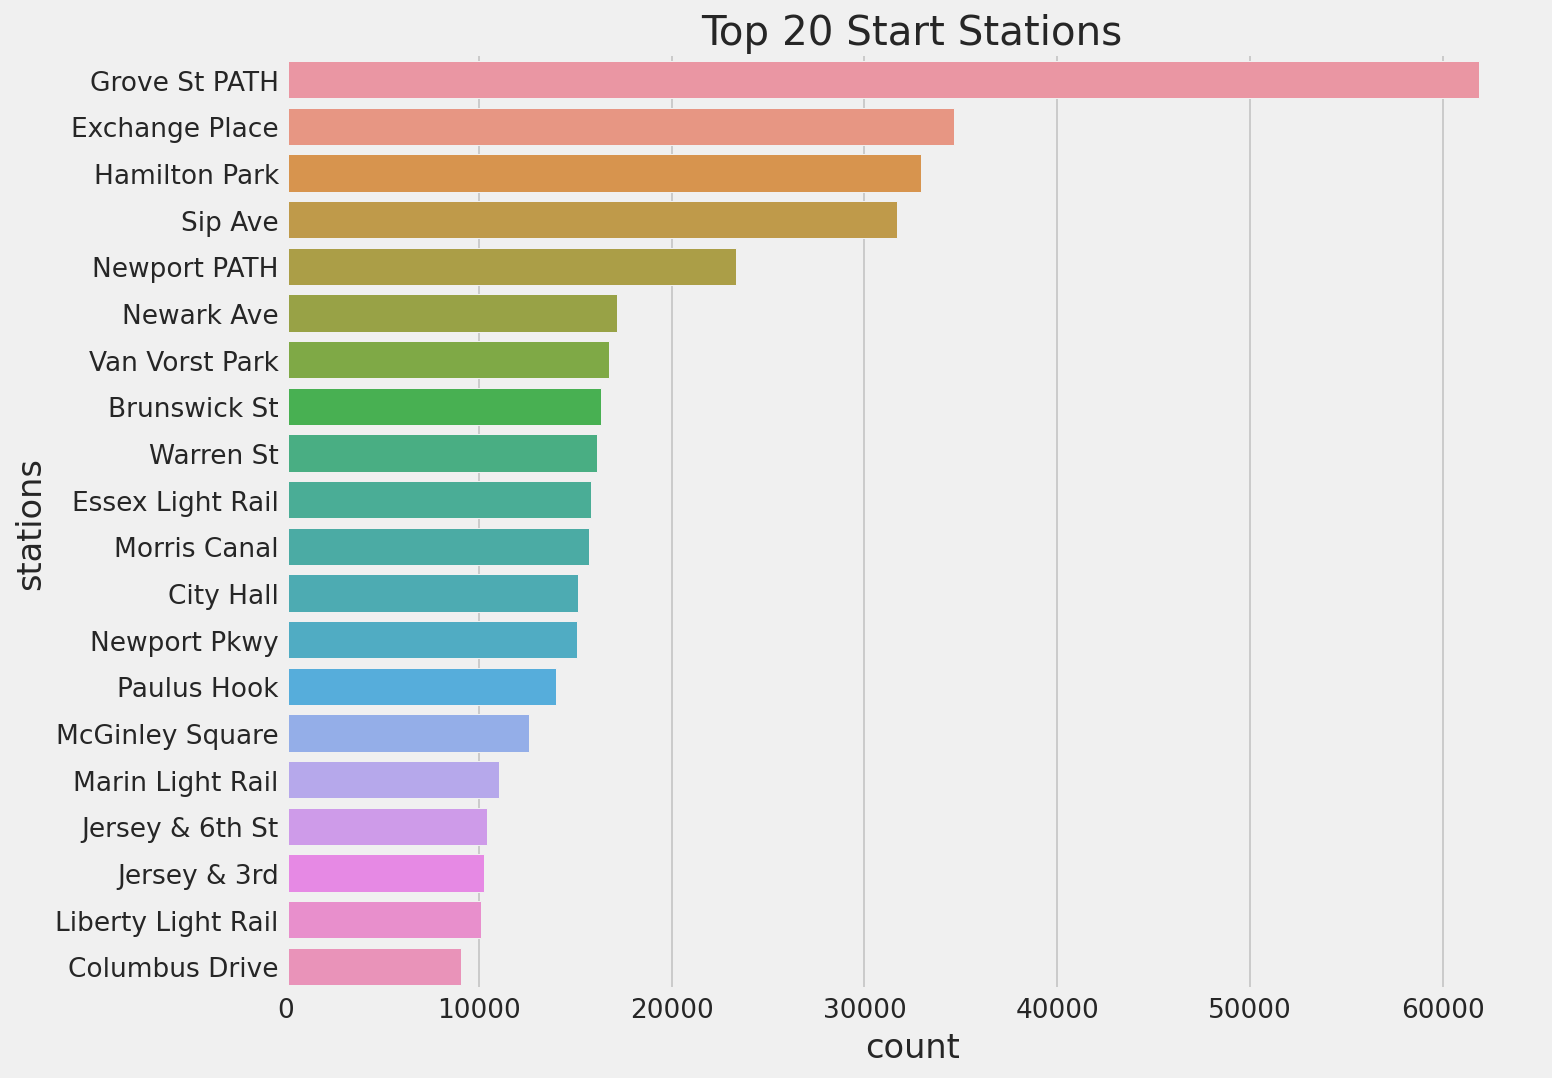

In [ ]:
startsstation = trip['start_station_name'].value_counts()[:20]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

sns.barplot( x=startsstation.values , y=list(startsstation.index),  orient="h")
plt.title("Top 20 Start Stations")
plt.xlabel('count')
plt.ylabel('stations')


sns.despine()

**Top 20 End Stations:**

Text(0, 0.5, 'stations')

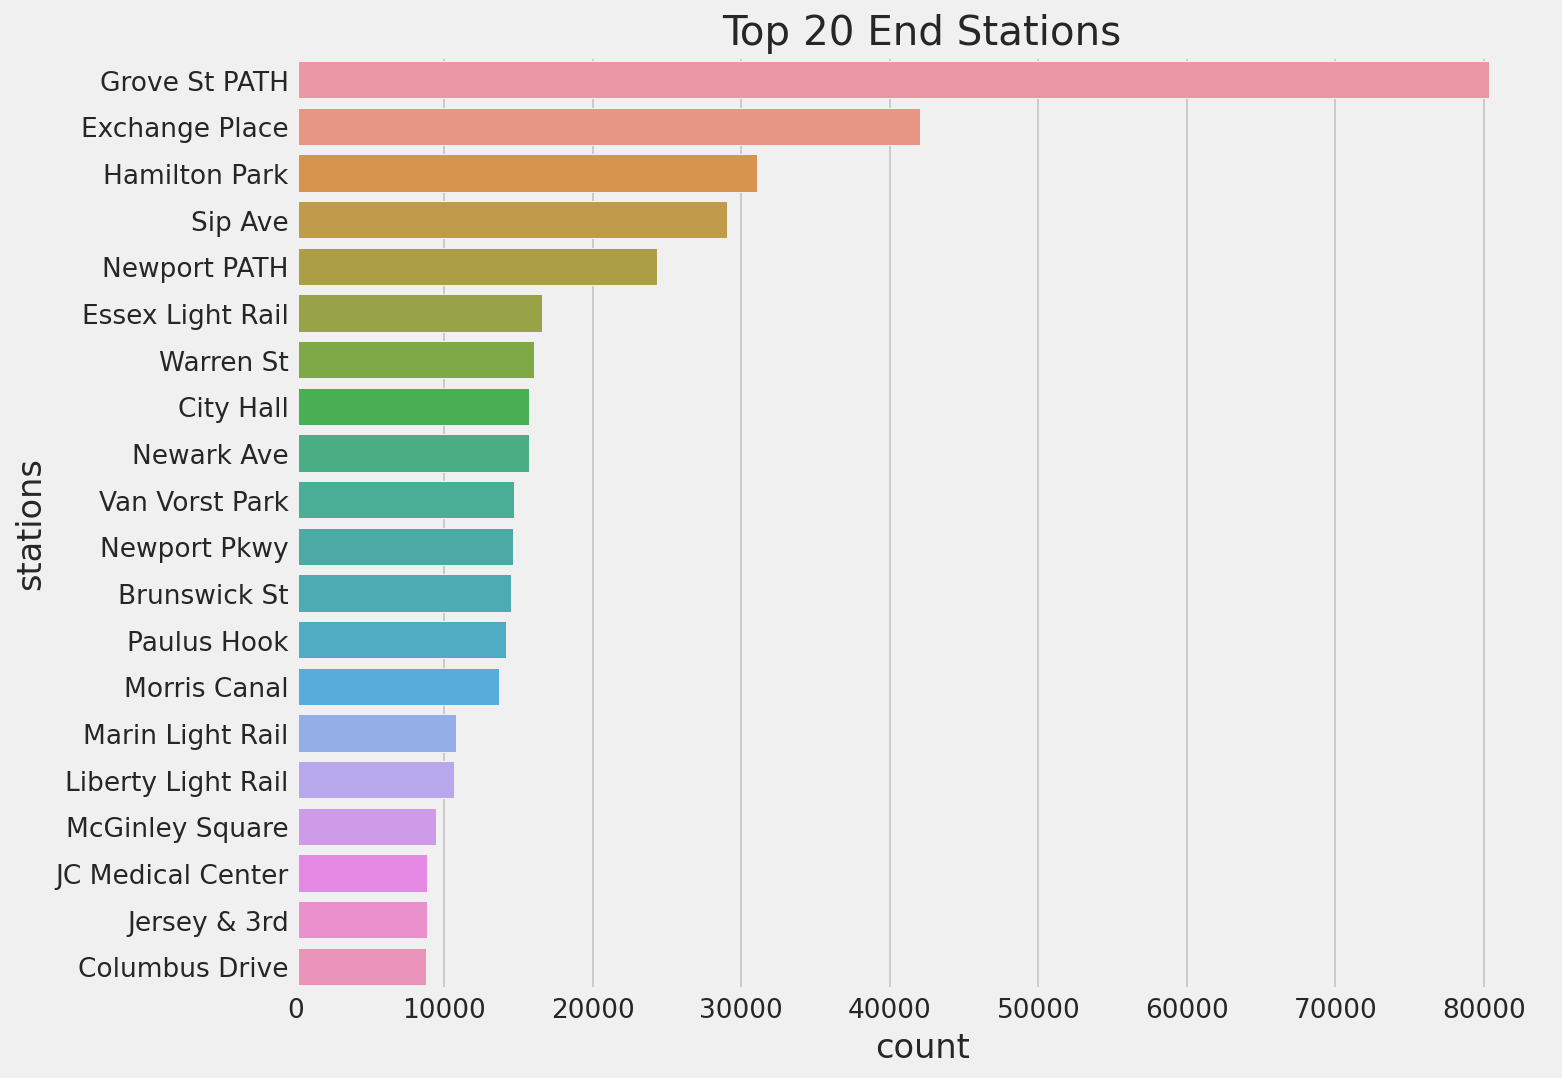

In [ ]:
endstation = trip['end_station_name'].value_counts()[:20]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

sns.barplot( x=endstation.values , y=list(endstation.index),  orient="h")
plt.title("Top 20 End Stations")
plt.xlabel('count')
plt.ylabel('stations')

In [ ]:
(endstation.index).difference(startsstation.index)

Index(['JC Medical Center'], dtype='object')

In [ ]:
(startsstation.index).difference(endstation.index)

Index(['Jersey & 6th St'], dtype='object')

In [ ]:
#create a dataframe and put both in the dataframe
#displaying in percentage

startsstation = trip['start_station_name'].value_counts(normalize=True)[:20]
endstation = trip['end_station_name'].value_counts(normalize=True)[:20]
se_df = pd.DataFrame({'start station': 100*startsstation})
se_df['end station'] = 100*endstation
se_df

,start station,end station
Grove St PATH,12.287222,15.956067
Exchange Place,6.884372,8.353976
Hamilton Park,6.538724,6.174799
Sip Ave,6.293988,5.768364
Newport PATH,4.631695,4.837098
Newark Ave,3.415369,3.117991
Van Vorst Park,3.325182,2.916760
Brunswick St,3.250689,2.875441
Warren St,3.200232,3.184936
Essex Light Rail,3.145802,3.296577


Generally, the only difference between the top 20 start and end stations are the `JC Medical Center and Jersey & 6th St`. The top five stations with most trips in both start and end stations are same : `Grove St PATH, Exchange Place, Hamilton Park, Sip Ave  and Newport PATH `

Now, i would focus on top stations on each year:

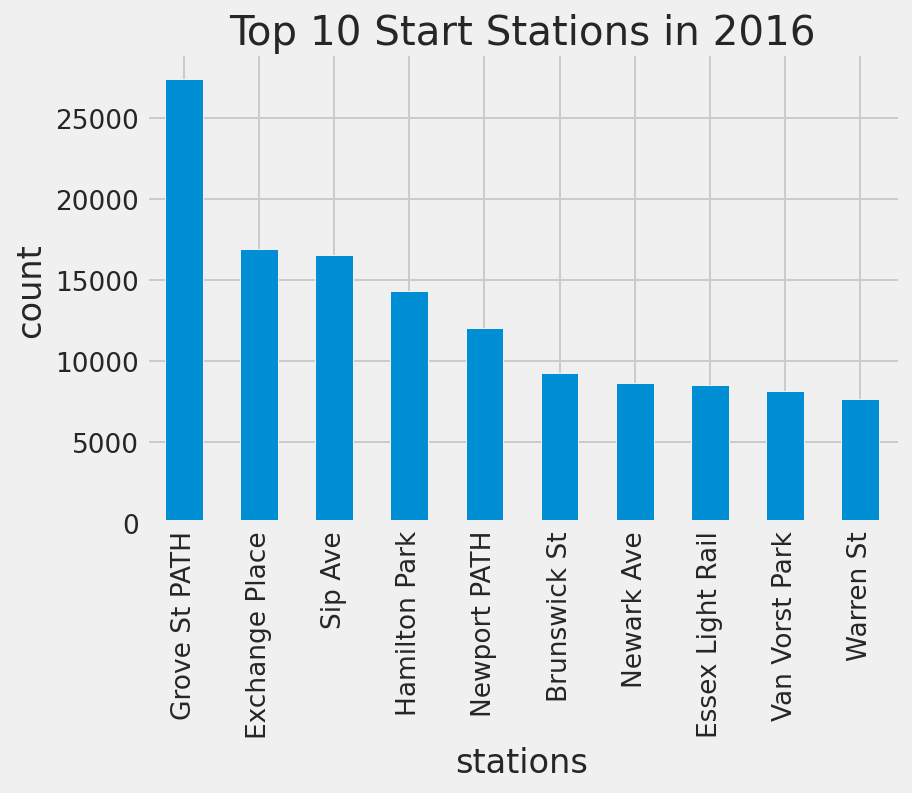

In [ ]:
#trip.groupby(['year', 'start_station_name']).size().to_frame('count').reset_index().sort_values('count', ascending = False)
#splitting the data into 2016 and 2017

trip_2016 = trip[trip['year']==2016]
trip_2017 = trip[trip['year']==2017]

plt.style.use('fivethirtyeight')



#plotting the top 10 start stations in 2016
trip_2016['start_station_name'].value_counts()[:10].plot.bar()
plt.title("Top 10 Start Stations in 2016")
plt.xlabel('stations')
plt.ylabel('count')




sns.despine()

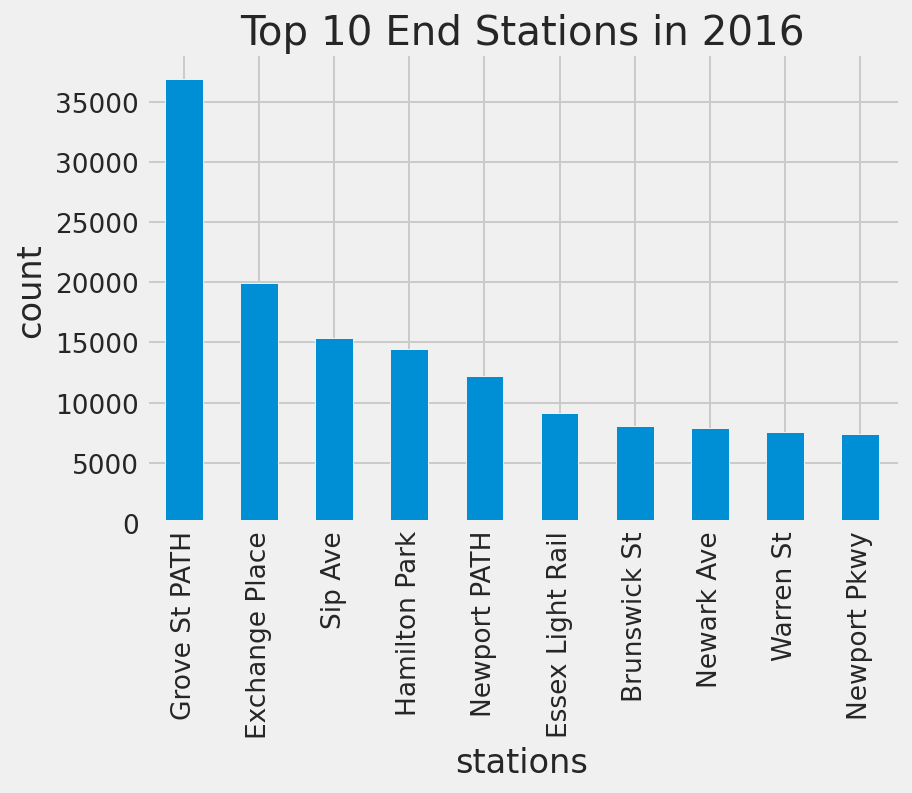

In [ ]:
#plotting the top 10 end stations in 2016
trip_2016['end_station_name'].value_counts()[:10].plot.bar()
plt.title("Top 10 End Stations in 2016")
plt.xlabel('stations')
plt.ylabel('count')

sns.despine()


As seen above, these stations are the top 5 stations (start and end) with most trips in 2016: `Grove St PATH, Exchange Place, Sip Ave, Hamilton Park and Newport PATH`

Text(0, 0.5, 'count')

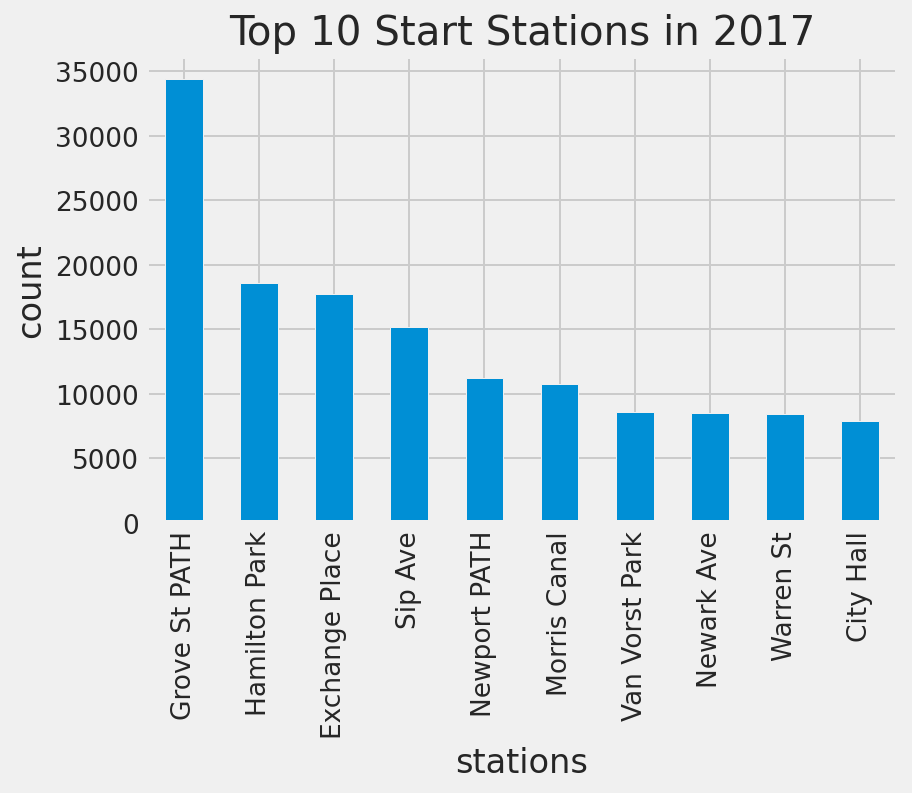

In [ ]:
#plotting the top 10 start stations in 2017

trip_2017['start_station_name'].value_counts()[:10].plot.bar()
plt.title("Top 10 Start Stations in 2017")
plt.xlabel('stations')
plt.ylabel('count')


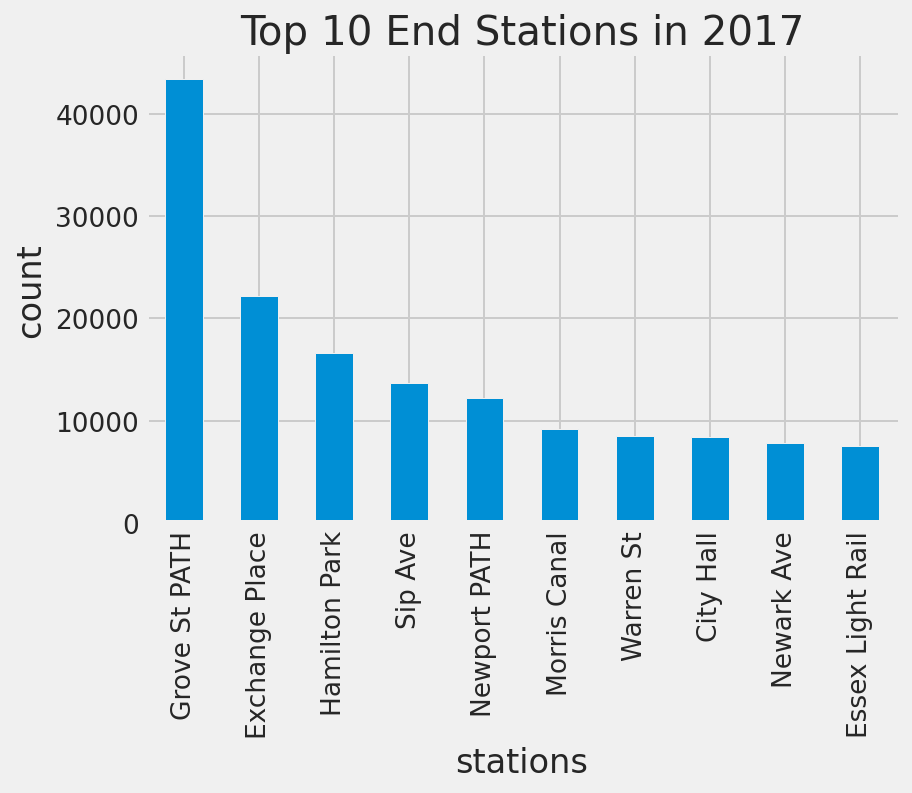

In [ ]:
#plotting the top 10 end stations in 2017
trip_2017['end_station_name'].value_counts()[:10].plot.bar()
plt.title("Top 10 End Stations in 2017")
plt.xlabel('stations')
plt.ylabel('count')

sns.despine()

The top 6 stations with most trips in 2017 are same : `Grove St PATH, Exchange Place, Sip Ave, Hamilton Park, Newport PATH and Morris Canal`



>*Therefore, the top stations with the most trips in 2016 and 2017 are `Grove St PATH, Exchange Place, Sip Ave, Hamilton Park, Newport PATH `*








**What are the least start and end stations?**

**Least 10 Start Stations:**

Text(0, 0.5, 'count')

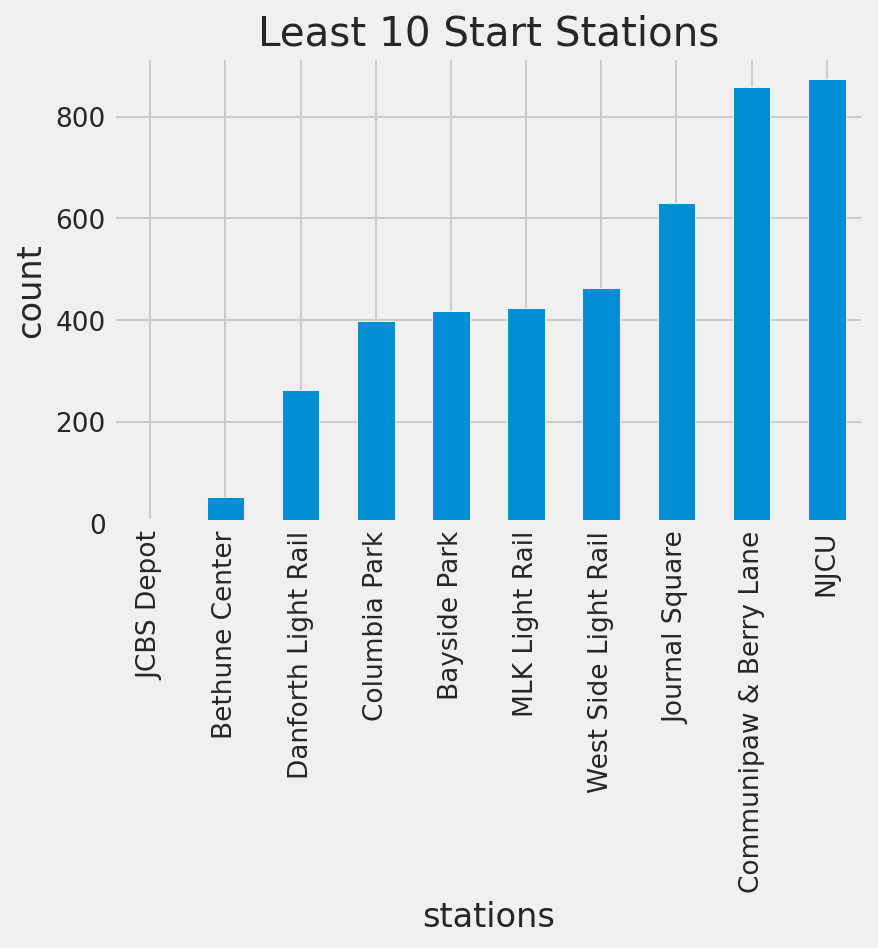

In [ ]:
trip['start_station_name'].value_counts().sort_values(ascending=True)[:10].plot.bar()
plt.title("Least 10 Start Stations")
plt.xlabel('stations')
plt.ylabel('count')

**Least 10 End Stations:**

Text(0, 0.5, 'count')

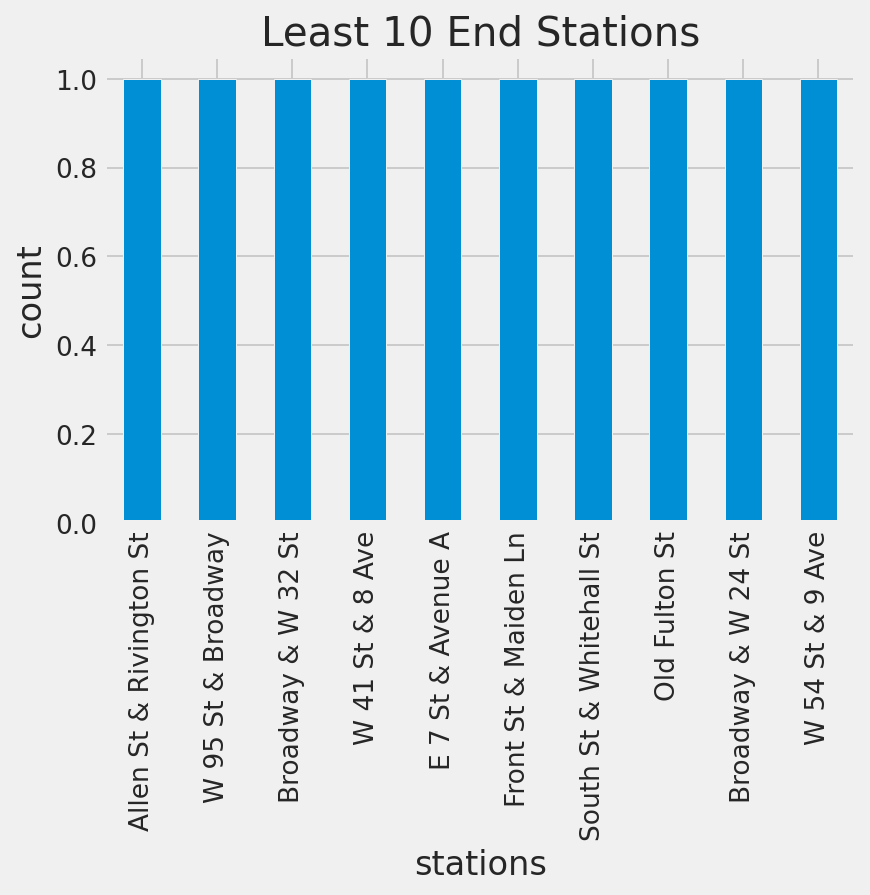

In [ ]:
trip['end_station_name'].value_counts().sort_values(ascending=True)[:10].plot.bar()
plt.title("Least 10 End Stations")
plt.xlabel('stations')
plt.ylabel('count')

**Which gender used the bike most often?**

In [ ]:
#gender
#get value counts (0 for unknown, 1 for male, 2 for female)
gender_counts = trip.gender.value_counts()

gender_counts


1.0    389582
2.0    111607
0.0      2212
Name: gender, dtype: int64

In [ ]:
# Mapping values in the gender column boolean values to words
mapp = {1.0:'male', 2.0:'female', 0.0:'unknown'}
trip['gender_w'] = trip['gender'].map(mapp)

#check
trip['gender_w'].tail(5)

15893    female
15894      male
15895      male
15896      male
15897      male
Name: gender_w, dtype: object

In [ ]:
#percentage values for gender
trip.gender_w.value_counts(normalize=True)*100

male       77.389993
female     22.170596
unknown     0.439411
Name: gender_w, dtype: float64

About 77 percent of males took trips and 22% of female took trips. I would break it down by year:

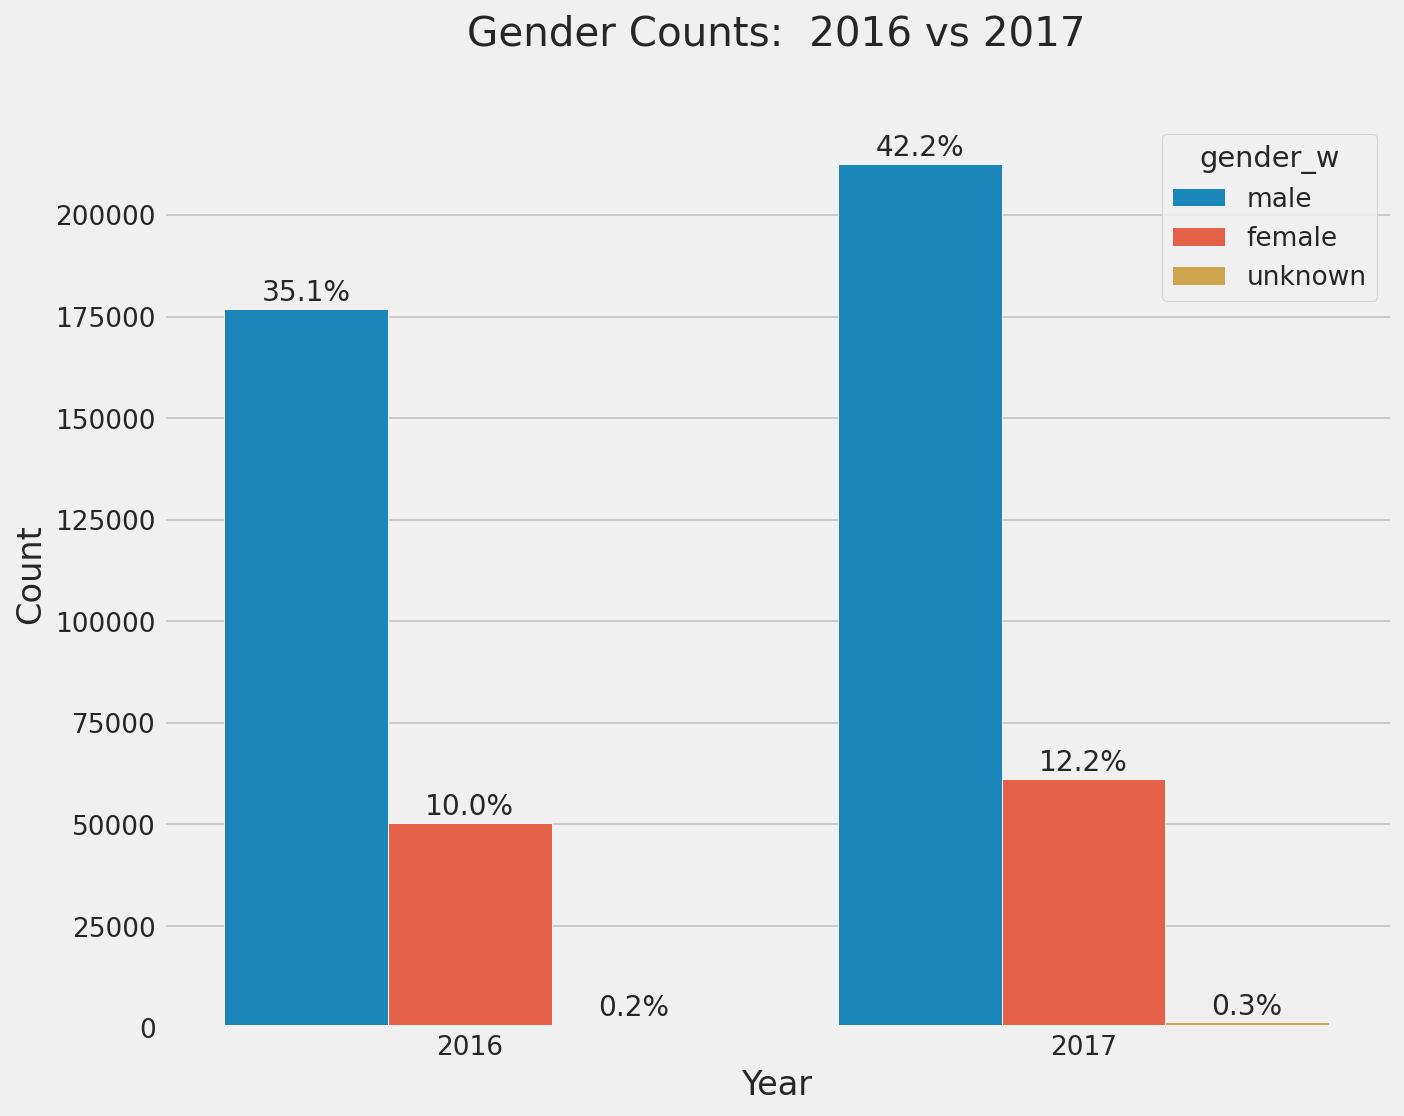

In [ ]:
#plotting gender
#trip.groupby(['year', 'gender_w']).size().to_frame('count').reset_index()

plt.figure(figsize=(10, 8))
ax = sns.countplot(data=trip,x='year',hue='gender_w')
plt.title('Gender Counts:  2016 vs 2017', y=1.07)
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=360)
total = len(trip)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()

sns.despine()
plt.show()

>Across all categories, there's an increase in count of trips. Males took more trips than any other gender.



**Number of trips by User Type**

In [ ]:
#user type
#get value counts (subscribers are annual pass holders, customers hold 24-hour passes or 3-day passes)
user_counts = trip['usertype'].value_counts()

user_counts

Subscriber    500817
Customer        2584
Name: usertype, dtype: int64

In [ ]:
ff = pd.DataFrame({'Number of Trips': user_counts})
ff['Percentage of Trips'] = trip['usertype'].value_counts(normalize=True)*100

ff

,Number of Trips,Percentage of Trips
Subscriber,500817,99.486692
Customer,2584,0.513308


>About 99% of 503,401 trips were taken by subscribers whereas customers took about 0.51%



**Trip Duration analysis**

In [ ]:
duration_description = trip['duration_mins'].describe()

duration_description

count    503401.000000
mean         10.821736
std         424.851647
min           1.016667
25%           3.900000
50%           5.816667
75%           9.650000
max      272163.466667
Name: duration_mins, dtype: float64

>The average trip duration in minutes is approx. 11 minutes.


**Average trip duration by User type**


<Figure size 576x432 with 0 Axes>

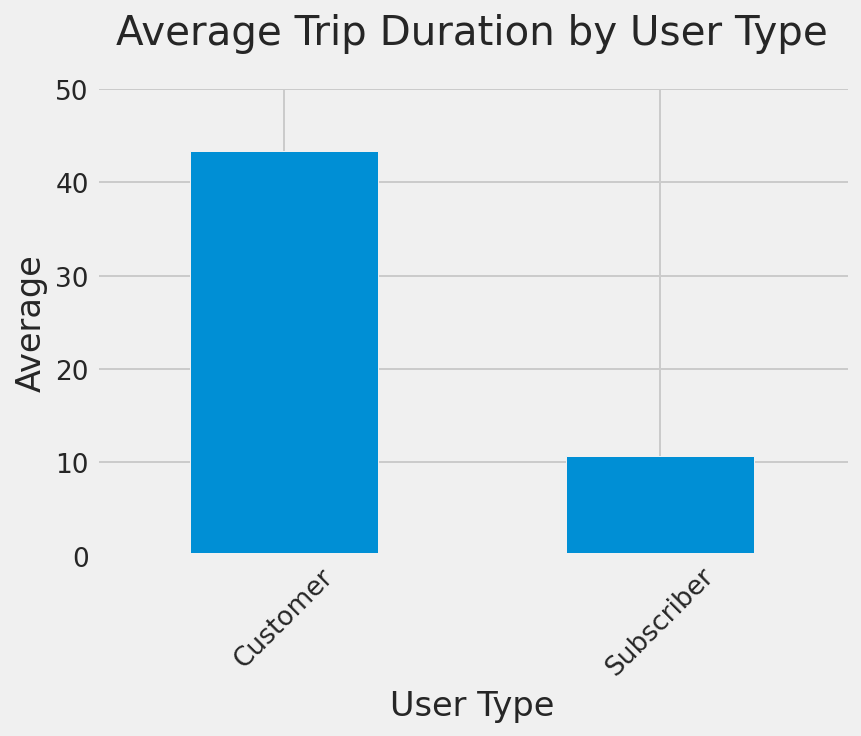

In [ ]:
tdut = trip[['usertype', 'duration_mins']]

plt.figure(figsize=(8, 6))
tdut.groupby('usertype').mean().plot.bar(legend=False)
plt.title('Average Trip Duration by User Type', y=1.07)
plt.xlabel('User Type')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.yticks(np.arange(0,60,10))


sns.despine()
plt.show()

In [ ]:
tdut.groupby('usertype').mean()

,duration_mins
usertype,
Customer,43.410778
Subscriber,10.653590


>Customers rode approx. 32 minutes more than the Subscribers on average.

>Therefore, we observe that the  average ride length for all users is 11 minutes. While Subscribers only rode for 11 minutes on average, Customers rode for 43 minutes on average, a 32-minute difference from Subscribers.





**Average trip duration by Day of the week**

<Figure size 576x432 with 0 Axes>

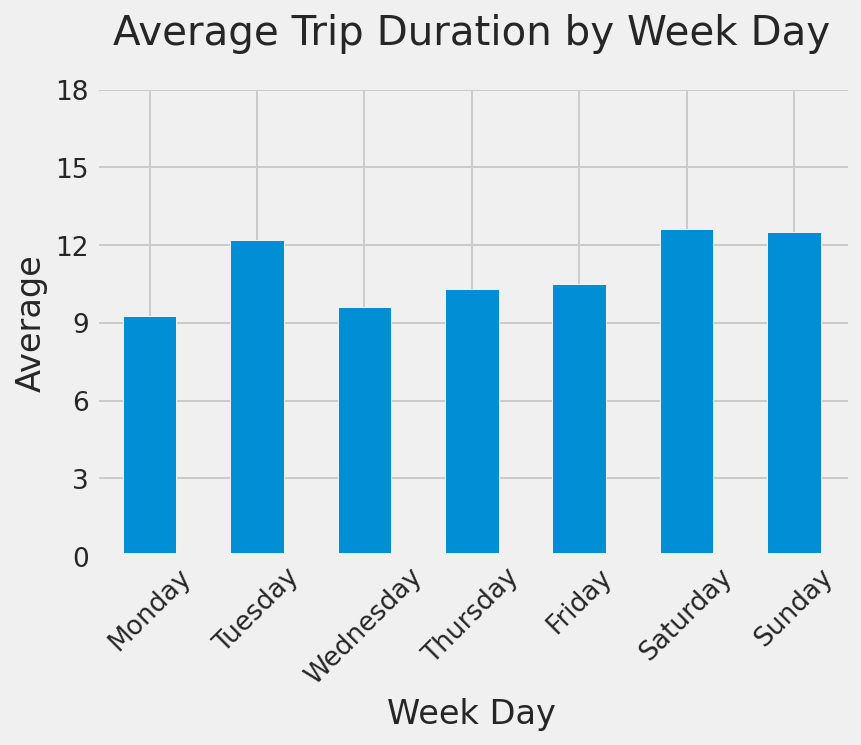

In [ ]:
tdut = trip[['start_day', 'duration_mins']]

plt.figure(figsize=(8, 6))

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
tdut.groupby('start_day').mean().loc[day_order].plot.bar(legend=False)
plt.title('Average Trip Duration by Week Day', y=1.07)
plt.xlabel('Week Day')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.yticks(np.arange(0,20,3))


sns.despine()
plt.show()

In [ ]:
tdut.groupby('start_day').mean()

,duration_mins
start_day,
Friday,10.490701
Monday,9.268434
Saturday,12.625788
Sunday,12.501021
Thursday,10.290902
Tuesday,12.190236
Wednesday,9.607944


>The busiest day is Saturday while the busiest weekday is Tuesday.

>The weekends are busier, then as the week progresses, we see a peak on Tuesday. Also, there is a considerable drop on wednesday.

**Average Trip Duration on Start Stations:**

In [ ]:
start_trip = trip[['start_station_name', 'duration_mins']]
start_trip.groupby('start_station_name')['duration_mins'].mean().to_frame('average_mins').reset_index().sort_values('average_mins', ascending=False)

,start_station_name,average_mins
4,Bethune Center,113.256090
7,Central Ave,103.931072
53,West Side Light Rail,63.644661
1,Astor Place,46.825752
13,Danforth Light Rail,28.616858
43,North St,27.358105
30,Leonard Gordon Park,23.121191
3,Bayside Park,21.591487
39,NJCU,20.751392
10,Columbia Park,19.530528


>We can see that the following start stations are the top 5 stations based on average trip duration : `Bethune Center, Central Ave,	West Side Light Rail, Astor Place and Danforth Light Rail`



**Average Trip Duration on End Stations:**

In [ ]:
end_trip = trip[['end_station_name', 'duration_mins']]
end_trip.groupby('end_station_name')['duration_mins'].mean().to_frame('average_mins').reset_index().sort_values('average_mins', ascending=False)

,end_station_name,average_mins
68,JCBS Depot,1365.829391
19,Broadway & W 32 St,403.883333
127,W 41 St & 8 Ave,288.333333
133,W 70 St & Amsterdam Ave,212.766667
101,Riverside Dr & W 104 St,211.155556
...,...,...
23,Brunswick & 6th,7.267208
85,Monmouth and 6th,6.925799
59,Grove St PATH,6.546084
71,Jersey & 6th St,6.533974


>We can see that the following end stations are the top 5 stations based on average trip duration : `JCBS Depot, Broadway & W 32 St, W 41 St & 8 Ave, W 70 St & Amsterdam Ave and	Riverside Dr & W 104 St`

**Trips that started and ended at same station**

In [ ]:
start_end = trip[(trip['start_station_name'] == trip['end_station_name'])]
len(start_end)

18219

In [ ]:
len(start_end)/len(trip) *100       #percentage of trips that started and ended at same station

3.6191823218467976

In [ ]:
#trips that started and ended at different station

print('Different stations: ', len(trip) - len(start_end))

(len(trip) - len(start_end))/len(trip) *100

Different stations:  485182


96.38081767815319

>About 18,219 trips started and ended at same station; this is about approx. 4% of total trips

>About 96% of total trips started and ended at diferent stations


**Average Trip Duration on Trips that started and ended at same station**

In [ ]:
start_end.groupby('start_station_name')['duration_mins'].mean().to_frame('average_mins').reset_index().sort_values('average_mins', ascending=False)

,start_station_name,average_mins
52,West Side Light Rail,593.502632
29,Leonard Gordon Park,200.156219
13,Danforth Light Rail,90.319753
17,Exchange Place,66.456456
23,Hilltop,49.744534
10,Columbia Park,41.055303
22,Heights Elevator,40.498577
30,Liberty Light Rail,39.177306
24,JC Medical Center,39.144772
28,Lafayette Park,37.482333


>We can see that the following stations are the top 5 stations (trips that started and ended at same station) based on average trip duration : `West Side Light Rail, Leonard Gordon Park, Danforth Light Rail, Exchange Place and Hilltop	`




**Trip Analysis**


**Number of trips by month:**

<Figure size 576x432 with 0 Axes>

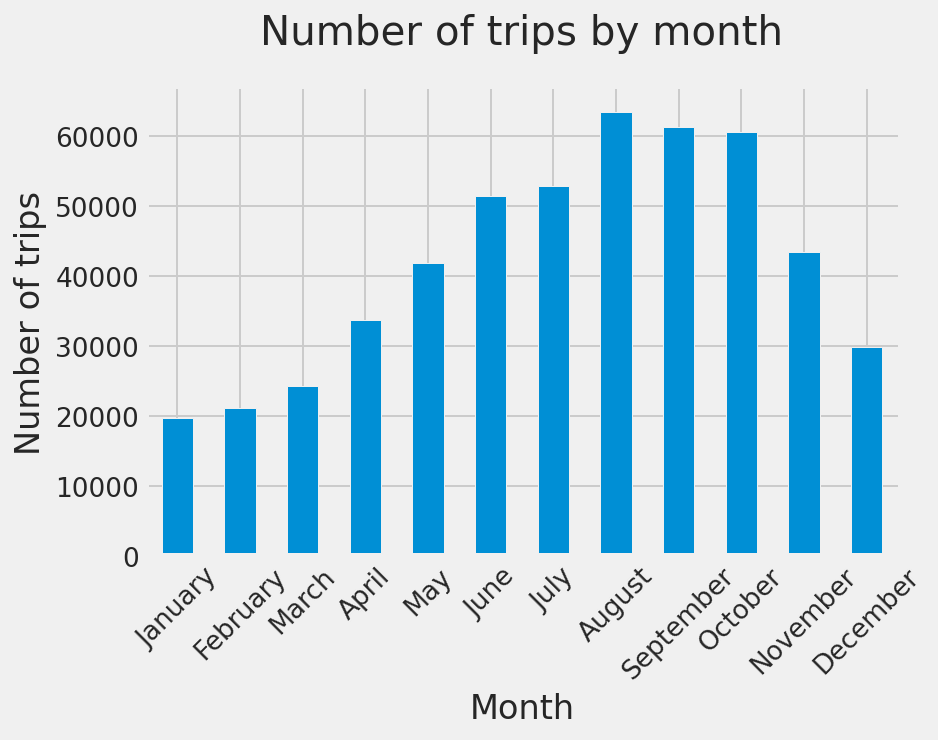

In [ ]:
total_t = trip[['month', 'start_station_id']]

plt.figure(figsize=(8, 6))

month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
total_t.groupby('month').count().loc[month_order].plot.bar(legend=False)
plt.title('Number of trips by month', y=1.07)
plt.xlabel('Month')
plt.ylabel('Number of trips')
plt.xticks(rotation=45)



sns.despine()
plt.show()

>As seen above, the busiest month is August

**Number of trips by year:**

In [ ]:
trip['year'].value_counts(normalize = True)*100

2017    54.667353
2016    45.332647
Name: year, dtype: float64

>55% of the total number of trips were taken in 2017. Therefore, more trips were taken in 2017 than in 2016







**Number of trips by year and month:**

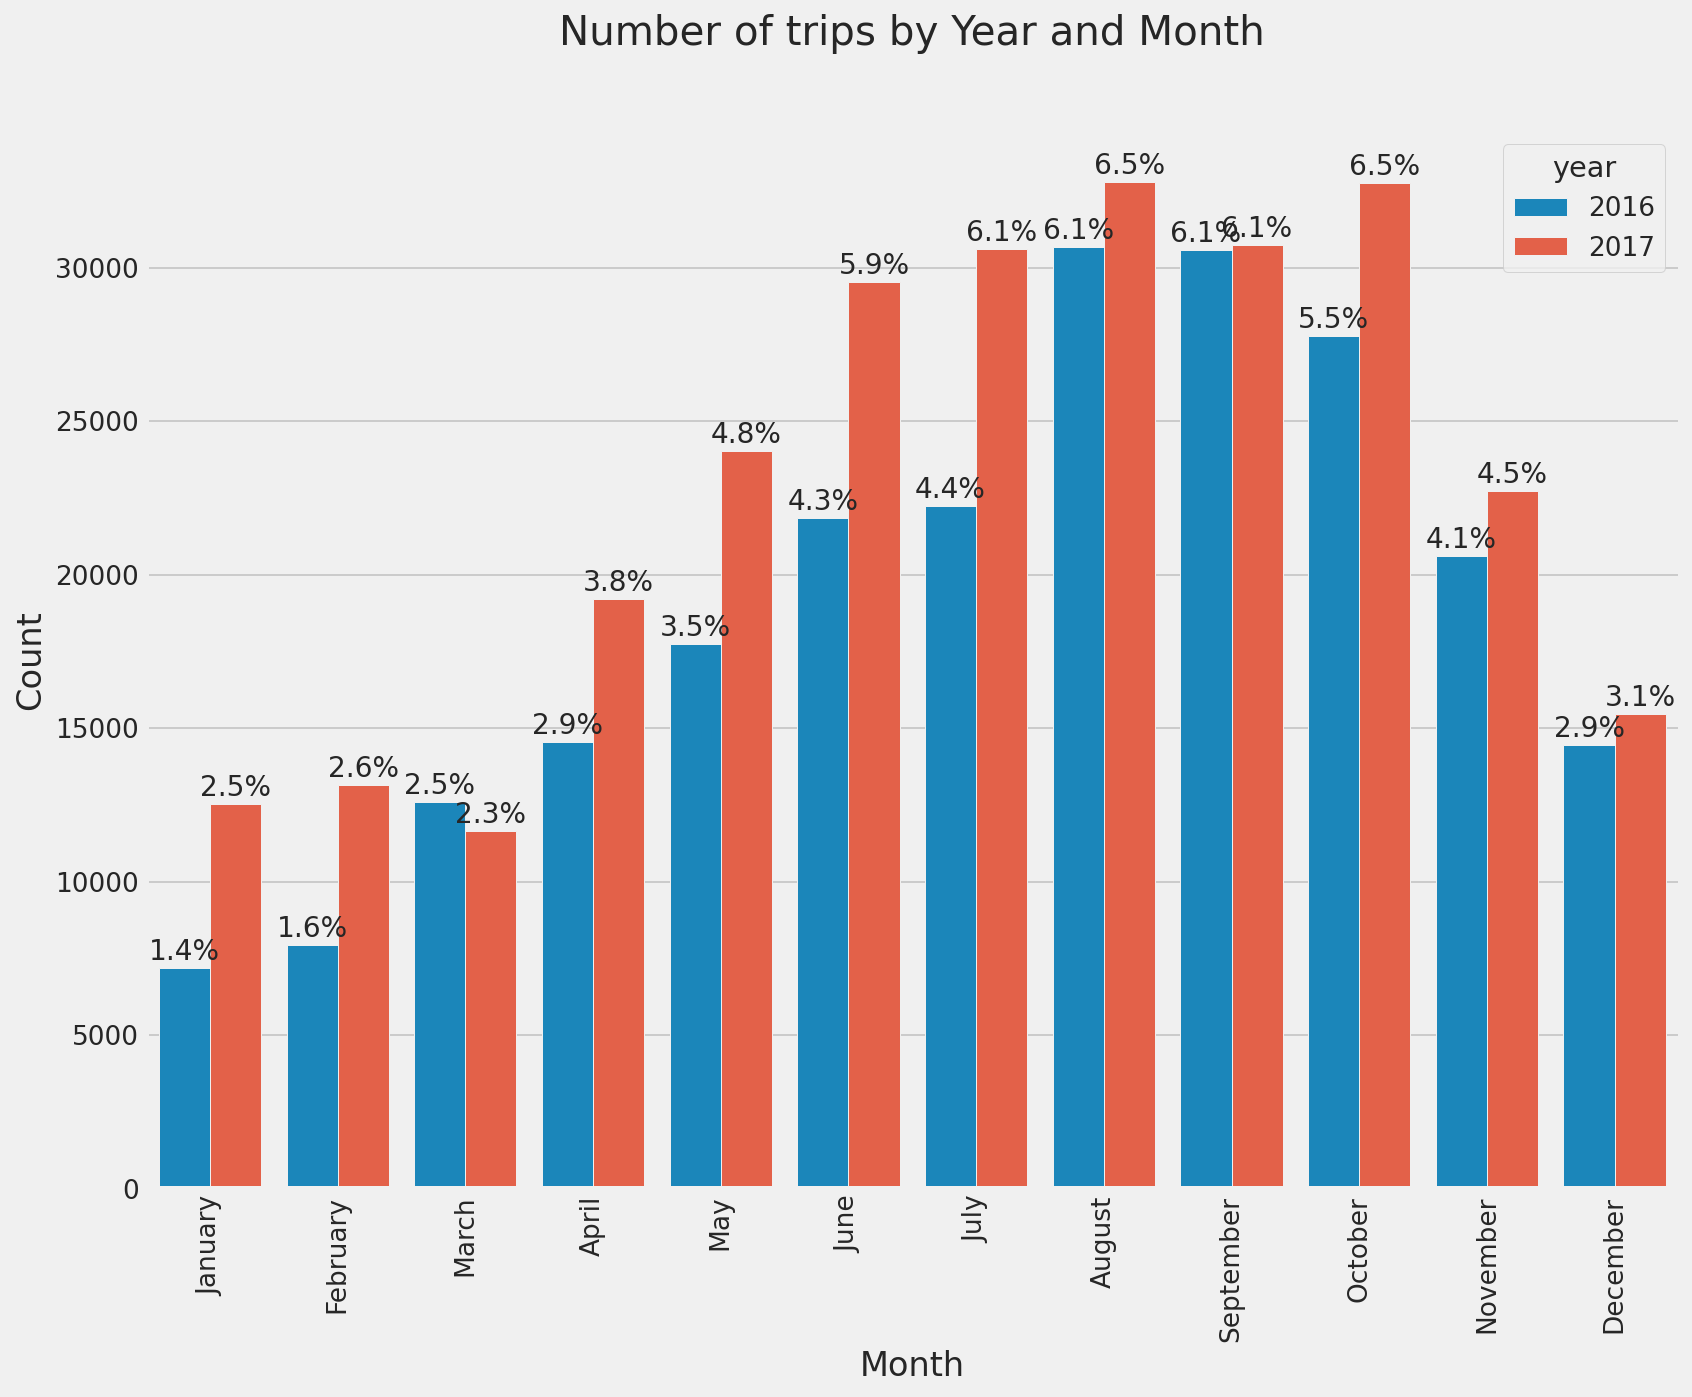

In [ ]:
plt.figure(figsize=(12, 10))
ax = sns.countplot(data=trip,x='month',hue='year')
plt.title('Number of trips by Year and Month', y=1.07)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=90)
total = len(trip)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()

sns.despine()
plt.show()

In [ ]:
trip.groupby(['year','month'])['start_station_id'].size()

year  month    
2016  April        14562
      August       30663
      December     14460
      February      7920
      January       7177
      July         22239
      June         21838
      March        12609
      May          17754
      November     20622
      October      27776
      September    30585
2017  April        19213
      August       32803
      December     15448
      February     13145
      January      12522
      July         30613
      June         29534
      March        11664
      May          24023
      November     22735
      October      32761
      September    30735
Name: start_station_id, dtype: int64

>August is the busiest month in both years. More number of trips were taken in 2017 except for the month of March.





**Number of trips by Weekday and User Type:**

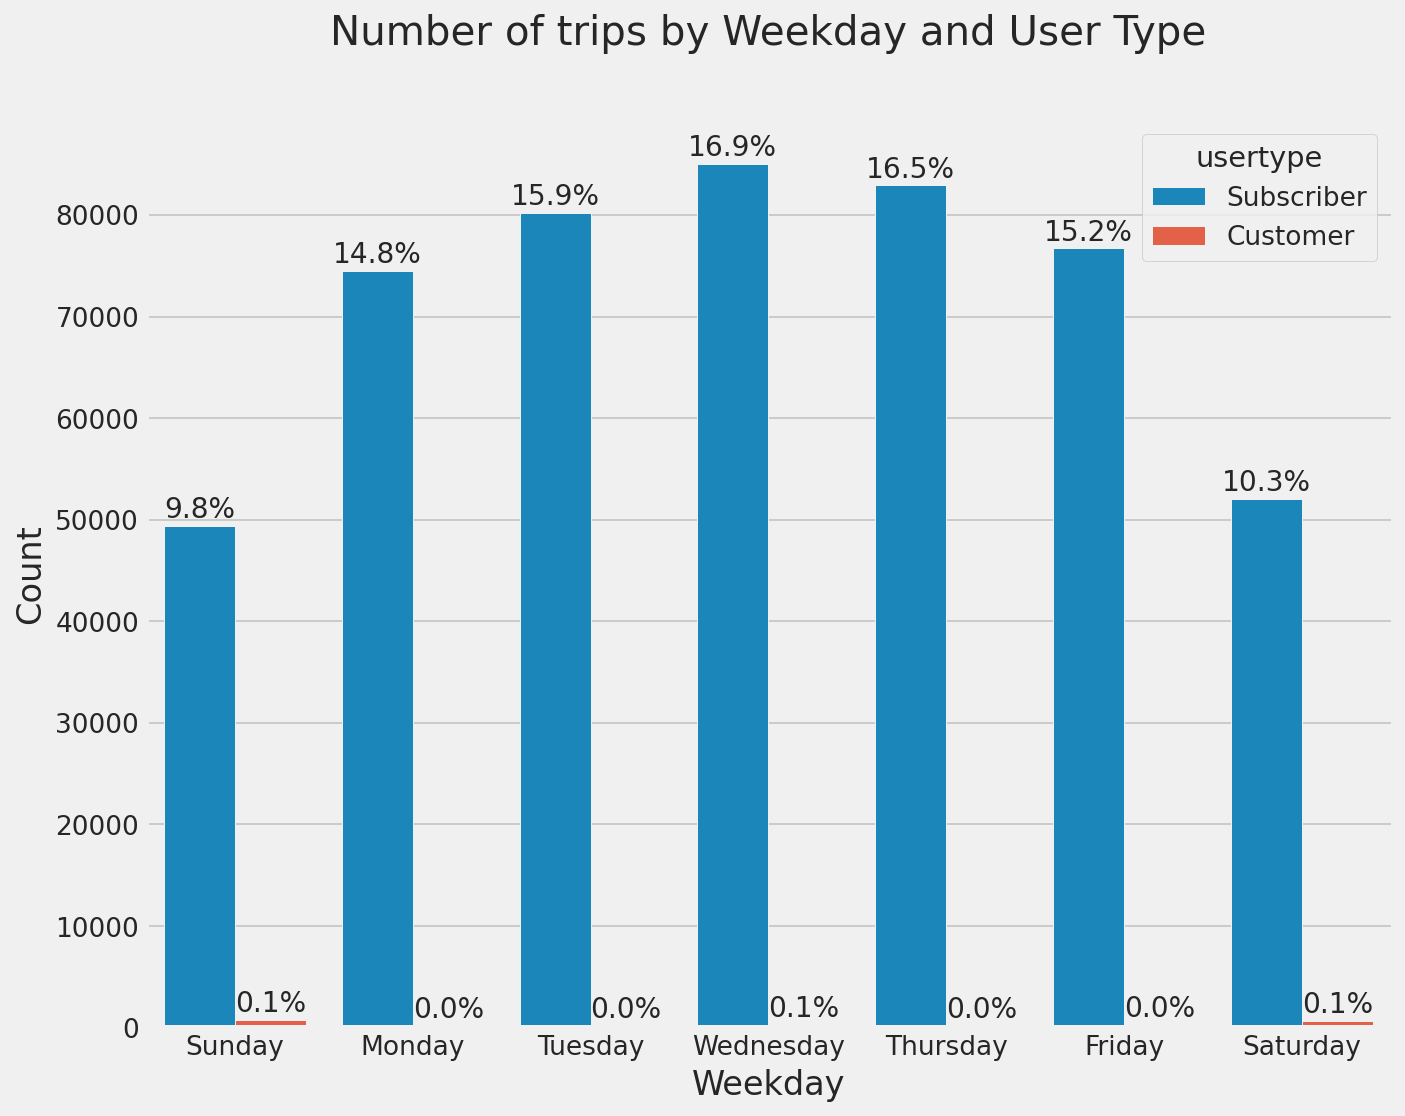

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=trip,x='start_day',hue='usertype')
plt.title('Number of trips by Weekday and User Type', y=1.07)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=360)
total = len(trip)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()

sns.despine()
plt.show()

In [ ]:
trip.groupby(['start_day','usertype']).size()

start_day  usertype  
Friday     Customer        243
           Subscriber    76710
Monday     Customer        217
           Subscriber    74513
Saturday   Customer        641
           Subscriber    52033
Sunday     Customer        752
           Subscriber    49363
Thursday   Customer        218
           Subscriber    82926
Tuesday    Customer        231
           Subscriber    80214
Wednesday  Customer        282
           Subscriber    85058
dtype: int64

>Subscribers tend to make most of their trips on wednesdays and thursdays, while Customers make most of their trip on weekends

I will add generation and season columns to derive insights across these categories

**Analysis by generation:**

In [ ]:

#max birthyear
print('maximum birth year : ', trip['birth_year'].max())

maximum birth year :  2001.0


In [ ]:
#add generation column

conditions = [(trip['birth_year'] >= 1946) & (trip['birth_year'] <= 1964),
               (trip['birth_year'] >= 1965) & (trip['birth_year'] <= 1980),
              (trip['birth_year'] >= 1981) & (trip['birth_year'] <= 1996),
              (trip['birth_year'] >= 1997) & (trip['birth_year'] <= 2012)]

values = ['boomer', 'genx', 'geny', 'genz']

trip['generation'] = np.select(conditions,values)

#check

trip['generation'].sample(5)

565      genx
1083     genx
16765    genx
10773    geny
26424    geny
Name: generation, dtype: object

In [ ]:
trip['generation'].value_counts()

geny      280989
genx      169979
boomer     50079
genz        1306
0           1048
Name: generation, dtype: int64

In [ ]:
#fill the null

trip['generation'].replace('0', 'others', inplace=True)

#check
trip['generation'].value_counts()

geny      280989
genx      169979
boomer     50079
genz        1306
others      1048
Name: generation, dtype: int64

**Average trip duration by generation:**

<Figure size 576x432 with 0 Axes>

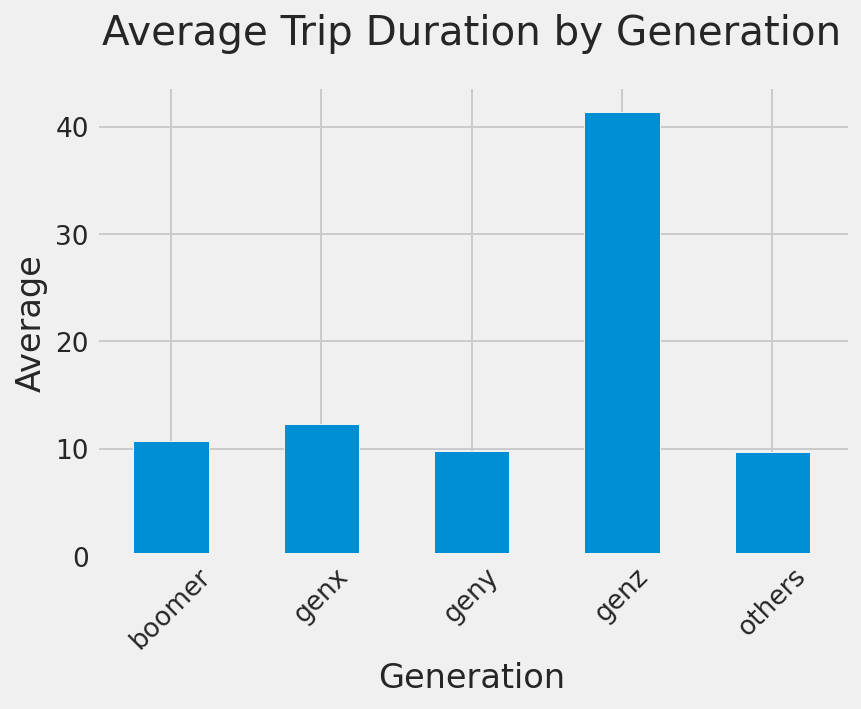

In [ ]:
tdg = trip[['generation', 'duration_mins']]

plt.figure(figsize=(8, 6))
tdg.groupby('generation').mean().plot.bar(legend=False)
plt.title('Average Trip Duration by Generation', y=1.07)
plt.xlabel('Generation')
plt.ylabel('Average')
plt.xticks(rotation=45)
#plt.yticks(np.arange(0,60,10))


sns.despine()
plt.show()

In [ ]:
tdg.groupby('generation').mean()

,duration_mins
generation,
boomer,10.691070
genx,12.323974
geny,9.798311
genz,41.400919
others,9.704612


>Gen-z rode about 41 mins on average and the highest trip duration than any other group, followed by Gen-x.

**Number of trips by generation:**

<Figure size 576x432 with 0 Axes>

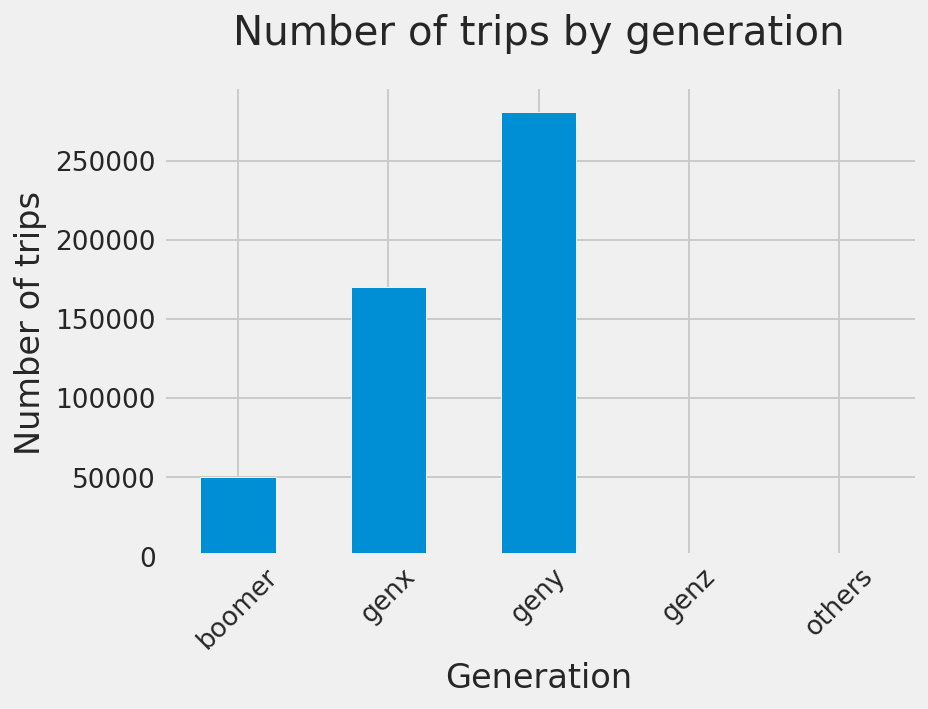

In [ ]:
plt.figure(figsize=(8, 6))

tdgc = trip[['generation', 'start_station_id']]
tdgc.groupby('generation').count().plot.bar(legend=False)
plt.title('Number of trips by generation', y=1.07)
plt.xlabel('Generation')
plt.ylabel('Number of trips')
plt.xticks(rotation=45)



sns.despine()
plt.show()

In [ ]:
tdgc.groupby('generation').count()

,start_station_id
generation,
boomer,50079
genx,169979
geny,280989
genz,1306
others,1048


>Here, we can see that Gen-x and Gen-y took more trips than any other category. Gen-y took the highest number of trips, about 56% approx. of the total number of trips; Gen-x took about 34%.

**Number of trips by Generation and User type:**

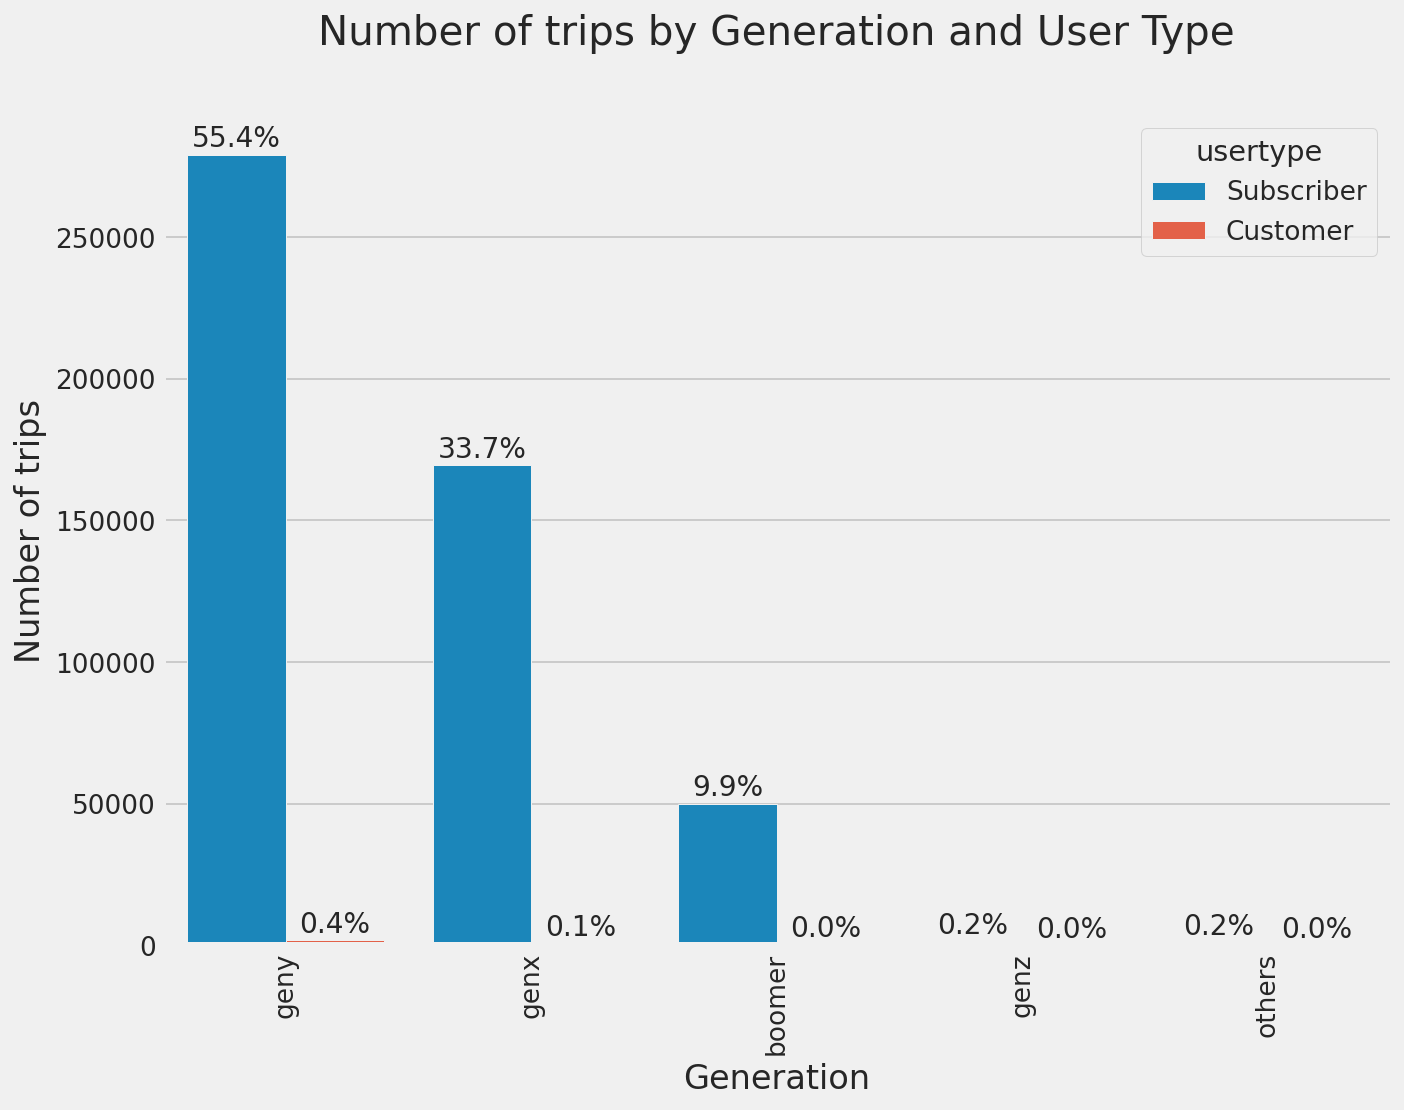

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=trip,x='generation',hue='usertype')
plt.title('Number of trips by Generation and User Type', y=1.07)
plt.xlabel('Generation')
plt.ylabel('Number of trips')
plt.xticks(rotation=90)
total = len(trip)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()

sns.despine()
plt.show()

In [ ]:
trip.groupby(['generation','usertype']).size()

generation  usertype  
boomer      Customer         124
            Subscriber     49955
genx        Customer         493
            Subscriber    169486
geny        Customer        1856
            Subscriber    279133
genz        Customer          96
            Subscriber      1210
others      Customer          15
            Subscriber      1033
dtype: int64

>Subscribers in the Gen-y group make up about 55.4% and Subscribers in the Gen-y group make up about 33.7% of the total number of trips. The highest trip share of Customers, about 0.4% are in the Gen-y group.

**Analysis by Season**

In [ ]:
#add season column

conditions = [(trip['month'] == 'January') | (trip['month'] == 'February') | (trip['month'] == 'December'),
               (trip['month'] == 'March') | (trip['month'] == 'April') | (trip['month'] == 'May'),
              (trip['month'] == 'June') | (trip['month'] == 'July') | (trip['month'] == 'August'),
              (trip['month'] == 'September') | (trip['month'] == 'October') | (trip['month'] == 'November')]
values = ['winter', 'spring', 'summer', 'fall']

trip['season'] = np.select(conditions,values)

#check

trip['season'].sample(5)

27964      fall
7020     winter
8310     summer
14692    winter
23371      fall
Name: season, dtype: object

**Number of trips by season:**

<Figure size 576x432 with 0 Axes>

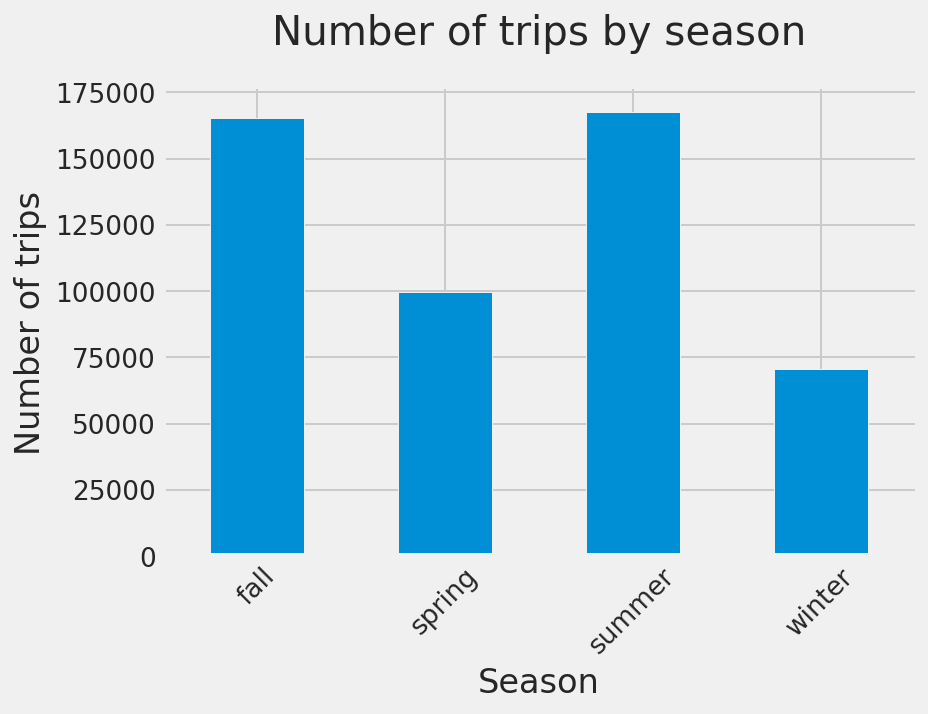

In [ ]:
t_season = trip[['season', 'start_station_id']]

plt.figure(figsize=(8, 6))

t_season.groupby('season').count().plot.bar(legend=False)
plt.title('Number of trips by season', y=1.07)
plt.xlabel('Season')
plt.ylabel('Number of trips')
plt.xticks(rotation=45)



sns.despine()
plt.show()

In [ ]:
trip.groupby('season').size()

season
fall      165214
spring     99825
summer    167690
winter     70672
dtype: int64

>Summer is the most popular season, followed closely by Fall. Trips drop by Spring and Winter.

##**B. Station Data**

Here, would import the citi bike stations; clean and analyze the data

In [ ]:
os.chdir("/content/drive/My Drive/stations")


extension = 'csv'
filename = [i for i in glob.glob('*.{}'.format(extension))]

#read
station = pd.concat([pd.read_csv(f) for f in filename])     #import

#export to csv
station.to_csv( "station.csv", index=False, encoding='utf-8-sig')

In [ ]:
#data exploration


#check
station.head()

,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys,last_reported
0,310,State St & Smith St (old),4565.06,40.689269,-73.989129,71.0,"CREDITCARD,KEY",1,False,0,0,1,0,False,False,False,False,2021-11-08T00:00:00
1,385,E 55 St & 2 Ave,6650.07,40.757973,-73.966033,71.0,"CREDITCARD,KEY",3,False,0,0,3,0,False,False,False,False,2021-11-07T00:00:00
2,3244,University Pl & E 8 St,5755.14,40.731437,-73.994903,71.0,"CREDITCARD,KEY",3,False,0,0,3,0,False,False,False,False,2021-11-01T00:00:00
3,3297,6 St & 7 Ave,3834.10,40.668663,-73.979881,71.0,"CREDITCARD,KEY",3,False,0,0,3,0,False,False,False,False,2021-11-08T00:00:00
4,3310,14 St & 7 Ave,3731.11,40.663779,-73.983968,71.0,"CREDITCARD,KEY",3,False,0,0,3,0,False,False,False,False,2021-11-07T00:00:00


In [ ]:
#check for missing values
#check the shape of the dataframe

print(station.shape)
print('------------------------------------------\n')
station.info()

(1557, 18)
------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   station_id                 1557 non-null   int64  
 1   name                       1557 non-null   object 
 2   short_name                 1557 non-null   object 
 3   latitude                   1557 non-null   float64
 4   longitude                  1557 non-null   float64
 5   region_id                  1551 non-null   float64
 6   rental_methods             1557 non-null   object 
 7   capacity                   1557 non-null   int64  
 8   eightd_has_key_dispenser   1557 non-null   bool   
 9   num_bikes_available        1557 non-null   int64  
 10  num_bikes_disabled         1557 non-null   int64  
 11  num_docks_available        1557 non-null   int64  
 12  num_docks_disabled         1557 non-null   int64 

In [ ]:
#check for duplicates

len(station[station.duplicated()])

0

We only have few missing values in the region_id and there are no duplicates

In [ ]:


station.groupby('name').size().to_frame('cc').reset_index().sort_values('cc', ascending=False)

,name,cc
0,1 Ave & E 110 St,1
1023,Liberty St & Nassau St,1
1045,Madison Ave & E 99 St,1
1044,Madison Ave & E 82 St,1
1043,Madison Ave & E 26 St,1
...,...,...
516,Clinton St & Joralemon St,1
515,Clinton St & Grand St,1
514,Clinton St & Cherry St,1
513,Clinton St & Centre St,1


In [ ]:
station['name'].nunique()

1557

All rows are unique; each station on one row

I will select some columns to use for the analysis

In [ ]:


s_df = station[['name','capacity', 'num_bikes_available', 'num_bikes_disabled', 'num_docks_available', 'num_docks_disabled', 'is_renting', 'is_returning', 'region_id']]



Below, I will sort by capacity to see the stations with maximum capacity of bikes

In [ ]:
s_df.sort_values(['capacity', 'num_bikes_available', 'num_docks_available'], ascending = [False, False, False])[:40]


,name,capacity,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_renting,is_returning,region_id
1550,Laight St & Hudson St,91,75,5,11,0,True,True,71.0
1490,Lafayette St & E 8 St,91,46,5,40,0,True,True,71.0
1542,W 20 St & 8 Ave,84,70,7,7,0,True,True,71.0
1523,FDR Drive & E 35 St,83,54,8,21,0,True,True,71.0
1317,E 33 St & 1 Ave,83,27,1,55,0,True,True,71.0
1540,Centre St & Worth St,82,69,2,11,0,True,True,71.0
1556,E 10 St & Avenue A,81,79,2,0,0,True,True,71.0
1554,E 11 St & 3 Ave,80,76,1,3,0,True,True,71.0
1555,Allen St & Hester St,79,78,1,0,0,True,True,71.0
1553,48 Ave & 5 St,79,76,0,3,0,True,True,71.0


>Its interesting that those stations above which has high capacity of bikes and docks, are all in region 71

**Analysis of stations**

Using the earlier noted top start and end stations (based on number of trips) from the `trips dataset analysis`, I would section out those stations in this `s_df dataset` to get information on bikes, capacity and docks available

In [ ]:
startsstation.index     #top 20 start stations

Index(['Grove St PATH', 'Exchange Place', 'Hamilton Park', 'Sip Ave',
       'Newport PATH', 'Newark Ave', 'Van Vorst Park', 'Brunswick St',
       'Warren St', 'Essex Light Rail', 'Morris Canal', 'City Hall',
       'Newport Pkwy', 'Paulus Hook', 'McGinley Square', 'Marin Light Rail',
       'Jersey & 6th St', 'Jersey & 3rd', 'Liberty Light Rail',
       'Columbus Drive'],
      dtype='object')

In [ ]:
endstation.index       #top 20 end stations

Index(['Grove St PATH', 'Exchange Place', 'Hamilton Park', 'Sip Ave',
       'Newport PATH', 'Essex Light Rail', 'Warren St', 'City Hall',
       'Newark Ave', 'Van Vorst Park', 'Newport Pkwy', 'Brunswick St',
       'Paulus Hook', 'Morris Canal', 'Marin Light Rail', 'Liberty Light Rail',
       'McGinley Square', 'JC Medical Center', 'Jersey & 3rd',
       'Columbus Drive'],
      dtype='object')

In [ ]:
s_df_2 = s_df[s_df['name'].str.contains('Grove St PATH|Exchange Place|Hamilton Park|Sip Ave|Newport PATH|Newark Ave|Van Vorst Park|Brunswick St|Warren St|Essex Light Rail|Morris Canal|City Hall|Newport Pkwy|Paulus Hook|McGinley Square|Marin Light Rail|Jersey & 6th St|Jersey & 3rd|Liberty Light Rail|Columbus Drive|JC Medical Center', case=False)]

s_df_2

,name,capacity,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_renting,is_returning,region_id
35,City Hall - Washington St & 1 St,22,0,1,21,0,True,True,311.0
82,Sip Ave,34,0,4,30,0,True,True,70.0
122,Newport PATH,18,1,2,15,0,True,True,70.0
209,Grove St PATH,42,1,3,0,100,True,True,70.0
398,McGinley Square,22,4,3,15,0,True,True,70.0
436,Paulus Hook,14,5,0,9,0,True,True,70.0
459,Brunswick St,22,5,0,17,0,True,True,70.0
489,Jersey & 3rd,14,6,0,8,0,True,True,70.0
674,Columbus Drive,14,9,0,5,0,True,True,70.0
693,JC Medical Center,22,9,0,13,0,True,True,70.0


>As seen above, the 21 stations with most trip volume in 2016 and 2017 did not make the list of top 40 stations with most capacity, bikes and docks available in 2021. Another insight from above results is this: the 21 stations with most trip volume are all in region 70

>Note that the first and the last four stations from the results above, are not among the top stations with most trip volume

>Only the `Exchange place` station is missing from the above result and not in the list of stations in 2021

I would check the stations that are not renting below:

In [ ]:
s_df[(s_df['is_renting'] == False) & (s_df['is_returning'] == False)]

,name,capacity,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_renting,is_returning,region_id
0,State St & Smith St (old),1,0,0,1,0,False,False,71.0
1,E 55 St & 2 Ave,3,0,0,3,0,False,False,71.0
2,University Pl & E 8 St,3,0,0,3,0,False,False,71.0
3,6 St & 7 Ave,3,0,0,3,0,False,False,71.0
4,14 St & 7 Ave,3,0,0,3,0,False,False,71.0
25,Audubon Ave & W 192 St,20,0,1,19,0,False,False,71.0
52,46 St & 25 Ave,24,0,24,0,0,False,False,71.0
66,Maiden Ln & Pearl St,29,0,0,0,29,False,False,71.0
100,Central Park West & W 68 St,43,0,0,0,43,False,False,71.0
491,Montgomery St,14,6,1,7,0,False,False,70.0


These stations have much capacity but does not rent bikes. Also, the majority of these stations are located in region 71

Using the earlier noted: top start, end stations and stations where trips ended and started at same station(based on average trip duration) from the trips dataset analysis; I would section out those stations in this s_df dataset to get information on bikes, capacity and docks available

In [ ]:
s_df[s_df['name'].str.contains(
    'Bethune Center|Central Ave|West Side Light Rail|Astor Place|Danforth Light Rail JCBS Depot|Broadway & W 32 St|W 41 St & 8 Ave|W 70 St & Amsterdam Ave|Riverside Dr & W 104 St West Side Light Rail|Leonard Gordon Park|Danforth Light Rail|Exchange Place|Hilltop')]

,name,capacity,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_renting,is_returning,region_id
119,Leonard Gordon Park,14,1,2,11,0,True,True,70.0
182,Hilltop,26,1,0,25,0,True,True,70.0
309,Central Ave & Melrose St,17,3,1,13,0,True,True,71.0
394,Central Ave & Weirfield St,21,4,0,17,0,True,True,71.0
404,Central Ave & Starr Street,23,4,0,19,0,True,True,71.0
420,Central Ave & Covert St,30,4,0,26,0,True,True,71.0
428,W 70 St & Amsterdam Ave,43,4,2,37,0,True,True,71.0
452,Central Ave & Flushing Ave,21,5,0,16,0,True,True,71.0
525,Central Ave & Decatur St,24,6,0,18,0,True,True,71.0
675,Astor Place,14,9,5,0,0,True,True,70.0


>Its interesting that the above stations are all located in regions 70 and 71. More investigation needs to be done on the trips from stations located in regions 70 and 71

>Some stations from the 2016 and 2017 are not on the 2021 station list. Maybe, there has been a change of names in some stations

##**5. Conclusion**


The following insights were derived from the analysis:
* The total number of trips taken in 2016 and 2017 is 503,401 trips
* More trips were taken in 2017 than 2016; 55% of total trips were in 2017
* 77% of the total trips were taken by Males; 22% by Females
* 99% of the total trips were taken by Subscribers
* 96% of trips started and ended at different stations
* Average Trip Length is 11 minutes
* Customers rode 32 minutes more than Subscribers on average
* By average trip duration, Saturday is the busiest day; Tuesday is the busiest weekday
* Busiest day is Wednesday; Weekdays are busier than weekends
* Busiest month is August
* Busiest season is Summer
* Subscribers tend to make most trips on Wednesday and Thursday; Customers on Weekends
* Gen-Z trip duration is about 41 minutes on average; followed by Gen-X which is about 12 minutes on average
* Gen-Y took highest number of trip about 56% of the total trips; Gen-X about 34%
* Subscribers make up about 55.4% and 33.7% of the Gen-Y and Gen-X group respectively
* The highest share of Customers which is about 0.4% are in the Gen-Y group
* Stations with most trip volume are all located in region 70.

##**6. Assumptions**

The following assumptions made during the analysis, will guide the recommendations in the next section:

* There's no data about the type of bikes at the stations. We don't know the bike preferences for certain groups of users, stations and seasons. This information would have been helpful in proper allocation of bike types to stations

* Since the station data did not align with the trip data (different years):- I assumed that top stations in 2016 and 2017 are still the stations with most trips in 2021

    * Therefore, the stations with the most trip volume should be given more capacity of bikes and docks

* The 21 stations (start and end stations) with most trip volume in 2016 and 2017 did not make the list of top 40 stations with most capacity of bikes and docks in 2021. The 40 stations are in region 71. Top stations with most trips are in region 70
   
   * Stations in 2021 that are not renting (most are in region 71) should start renting to drive revenue. Also, since these stations don't have much trip volume, some of the capacity should be reallocated to the stations with more trip volume (especially region 70 stations).
       



##**7. Recommendations**

Although about 99% of the total trips were taken by Subscribers, Customers rode 32 minutes more than Subscribers on average. Also, Customers tend to make most of the trips on weekends

  * Therefore, this is an opportunity to convert Customers to Subscribers and increase revenue. Alta Bicycle Share can capture the market share of casual riders by personalizing discounts and perks in the subscription program to their preferences, and riding habits. Example: attractive weekend packages and discounts; targeted ads containing emphasis on the benefits of being a subscriber

Insights from the generation group analysis shows an opportunity to convert Gen-Z users to subscribers. Although Gen-Y and Gen-X took more number of trips, Gen-Z had more trip durations than the other two groups. Also, subscribers make up most of the Gen-Y and Gen-X group.
 * Alta Bicycle Share should target these market segments: Gen-X, Gen-Y and Gen-Z, with personalized discounts and privileges for subscription and customer program packages. Example: social media challenge across all popular platforms and offering gift cards, discounts, would attract a huge market share of Gen-Y and Gen-Z

*Other recommendations:*
 * Offer existing subscribers and customers with rewards in form of discounts and gift cards: when they make a referral; take pictures riding the bikes and share personal stories about the bike share service as part of social media hashtag challenge
 * Stations with the most trip volume should be given more capacity and allocation of bikes and docks, especially stations in region 70
 * Stations in 2021 that are not renting (majority are in region 71), should start renting to drive revenue and since these stations don't have much trip volume, some of the capacity should be reallocated to the stations with more trip volume. Also, more investigations need to be done on stations in region 71
 * Employ the services of female influencers with personal stories on the use of the bike share service. This would capture a huge market share of females to start using the bike share services
 * Summer being the most popular season is a perfect opportunity to convert customers to subscribers and acquire new users. This can be achieved with: exclusive summer package that can be used through to fall; targeted ads as summer season approaches; social media #summerbikeshare challenge
 * Host fun biking competitions with prizes at intervals for subscribers on the weekends. Since there are lot of customer riders on weekends,this will attract them to get a subscription.